In [16]:
%%capture
! jupyter nbconvert Capstone-Project-Final.ipynb --to slides --post serve


<img src="https://s-i.huffpost.com/gen/2272350/images/n-THANKSGIVING-628x314.jpg" width="800">
 # Predicting BMI and dietary habits with machine learning

_by: Phuah Wee Liang_




### Scope
---

Obesity is a rising global epidemic. Recent reports indicate that in just seven years, Singapore could reach a tipping point and lose valuable ground in fighting obesity.The aim of my studies is to try and predict 
- if the household's mean BMI is above or below the overweight range (24.9) based on their weekly food purchase. 
- if their weekly purchase will be healthy based on household characteristics like expenditures,income,assets ,etc

This is attempted through the implementation of different Machine Learning models and techniques.

### Data Sets
---
My data sets came from the USDA's National Household Food Acquisition and Purchase Survey (FoodAPS). A survey of 4,826 American households was conducted to collect unique and comprehensive data about household food purchases and acquisitions. The data sets consists of 11 separated csv files. I have utilised the following 4 files:
- faps_fahnutrients.csv
- faps_fafhnutrient_puf.csv
- faps_individual_puf.csv
- faps_household_puf.csv

In [19]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.max_rows', None)
data_dict = pd.read_csv('./data_dictionary.csv')
data_dict1 = pd.read_csv('./data_dictionary1.csv')
data_dict2 = pd.read_csv('./data_dictionary2.csv')

## Data Dictionaries
---
###  faps_fahnutrients.csv and faps_fafhnutrient_puf.csv
Both the data set has a total 143,050 rows and 130 columns.
- The faps_fahnutrients.csv file provides details on the Food-at-Home nutrients for each FAH item in the Food Acquisition and Purchase Survey.
- The faps_fafhnutrient_puf.csv file provides details on the Food-away-from-Home (FAFH) nutrients for each FAFH item in the Food Acquisition and Purchase Survey.

I created a dataframe for each file consisting of 16 columns extracted from it. Both dataframes' data dictionaries are the same. 



In [9]:
data_dict

,Column Name,dtype,Description,Example
0,hhnum,integer,6-digit unique identifier for each household (address),100381
1,usdadescmain,strings,USDA food category,"Sweet potato, raw, unprepared"
2,a_drinks,float,Alcoholic beverages,1.2
3,solid_fats,float,Solid fats,1.2
4,add_sugars,float,Foods defined as added sugars,1.2
5,d_total,float,"Total milk, yogurt, cheese, and whey",1.2
6,pf_total,float,"Total meat, poultry, seafood, organ & cured meats, eggs, soy, nuts and seeds",1.2
7,f_other,float,Total whole fruits and fruit juices,1.2
8,g_total,float,Total whole and refined grains,1.2
9,v_total,float,"Total dark green, red, and orange, starchy, and other vegetables",1.2


### faps_individual_puf.csv
The faps_individual_puf.csv file provides details on the individual-level variables collected through interview instruments in the National Household Food Acquisition and Purchase Survey (FoodAPS). The data set has a total 14,318 rows and 77 columns. 
The BMI and their corresponding household number 'hhnum' are extracted from the csv file and used to create a new dataframe. Primary respondents were asked to report the height and weight of each individual in the household.Reported height and weight have been used to compute the Body Mass Index (BMI) for individuals 2 years old (24 months) or older.

In [10]:
data_dict1

,Column Name,dtype,Description,Example
0,hhnum,integer,6-digit unique identifier for each household (address),100381.0
1,BMI,float,Individual's calculated Body Mass Index,24.8


### faps_household_puf.csv
The faps_household_puf.csv file provides provides details on the household-level variables collected through interview instruments in the National Household Food Acquisition and Purchase Survey. The data file faps_household_puf contains one record for each of the 4,826 households that completed both initial and final interviews. FoodAPS households are uniquely identified by the variable HHNUM. A new dataframe with 132 colums and 4826 rows are extracted. 


In [20]:
data_dict2

,Column_Name,dtype,Description,Example
0,hhnum,integer,6-digit unique identifier for each household (address),100228.000000
1,nonmetro,integer,Household does not reside in a Census core-based statistical area,1.000000
2,region,integer,Census region,3.000000
3,rural,integer,Household is in a rural Census tract,1.000000
4,famsize,integer,Number of people in residence related to the respondent,5.000000
5,inchhavg_r,float,Household average (monthly) income as sum of average imputed income per member,4667.330000
6,pctpovguidehh_r,float,INCHHAVG_R as percent of HH,207.360089
7,selfemployhh,integer,Anyone in household is self- employed,0.000000
8,jobchangeany,integer,Someone in household changed jobs within the last 3 months,1.000000
9,earnlessnum_r,integer,"Number in household changed jobs w/in last 3 months, earning less",0.000000



<img src="https://cdn.foe.co.uk/sites/default/files/styles/hero_image/public/media/images/vegetarian%20meal%20preparation.jpg?itok=MaInoXDu" width="700">
 
 
 
 
 ## Preprocessing data 


In [9]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import CountVectorizer
from fancyimpute import MICE,KNN
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from nltk.corpus import stopwords
import string
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import xgboost
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from category_encoders.binary import BinaryEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
import warnings 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


I created two class for preprocessing. The BmiPreprocessor() contains the following functions:
- the_get_food_features() function is used to extract the food key words from theusdadescmain column.Group the food key words by their household number. Split them into individual food key words. Use CounVetorizer to covert each foods key word into a feature and saved them to a new dataframe. Return this dataframe with the food features.

- the _combine_df() function takes in two dataframe. Create another dataframe from the individual input dataframe with the nutrients exctract out. Combine both new dataframes into one. Combine this newly created dataframe with the dataframe containing the food features and return as one dataframe.

- the get_bmi() function Extract BMI and hhnum column. Replace column containing'V' and 'E'.Impute NAN values and return.

- the transform function() Takes in three dataframe. Call the  self.get_bmi(),self._get_food_features(), self._get_food_features() and self._combine_df().Return a single dataframe to be used as features

In [10]:
class BmiPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = []
        
    def _get_food_onelist(self,df):
        '''Extract the food key words from theusdadescmain column.
        Return a new dataframe with one column 'food' that contains the food key words  '''
        df.usdadescmain.dropna(inplace=True)
        df['food'] = df.usdadescmain.map(lambda x: x.split(',')[0])
        df.food.dropna(inplace=True)
        df=df[['hhnum','food']]
        return df
    
    def get_food_list(self,df,df1):
        '''Combine both dataframe after _get_food_onelist extract the food key words from 
            usdadescmain column. '''
        X=self._get_food_onelist(df)
        X1=self._get_food_onelist(df1)
        X2=X1.combine_first(X)
        df=X2
        df=df.set_index('hhnum')
        return df

    
    def _get_food_features(self, df,df2):
        '''Extract the food key words from theusdadescmain column.
        Group the food key words by their household number.Split them into individual food key words.
        Use CounVetorizer to covert each foods key into a feature and saved to a new dataframe.
        Return this dataframe with the food feature dataframe.
        '''
        
        df.usdadescmain.fillna('nil',inplace=True)
        df['food'] = df.usdadescmain.map(lambda x: x.split(',')[0])
        df.food.dropna(inplace=True)
        df_temp=df[['hhnum','a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']]
        df=df[['hhnum','food']]
        df_temp=df_temp.groupby("hhnum").mean()
        df.fillna('nil',inplace=True)
        df=df.set_index('hhnum')
        df.food=df.food.apply(lambda x: x + '_')
        df=df.reset_index().groupby("hhnum").sum()
        df.food=df.food.apply(lambda x:x.replace('_',','))
        df = df.combine_first(df2)
        df.fillna('nil',inplace=True)
        cv = CountVectorizer(max_df=0.9 , max_features=1600,binary=True,lowercase=False,analyzer=lambda x: x.split(','))
        food_desc = cv.fit_transform(df.food)
        cv.get_feature_names()
        food_df = pd.DataFrame(food_desc.toarray(), columns=cv.get_feature_names())
        food_df.set_index(df.index,inplace=True)
        df=food_df
        df=df.combine_first(df_temp)
        return df
    
    def get_bmi(self,df2):
        
        '''Extract BMI and hhnum column. Replace column containing'V' and 'E'.
           Impute NAN values and return.
        '''
        df2=df2[['HHNUM','BMI']]
        df2=df2.rename(columns={'HHNUM':'hhnum'})
        df2=df2.replace('V',np.nan)
        df2=df2.replace('E',np.nan)
        df2.BMI=df2.BMI.astype('float')
        df2=df2.set_index('hhnum')
        solver=MICE()
        bmi=solver.complete(df2.values)
        bmi=pd.DataFrame(bmi)
        bmi.index=df2.index
        bmi.columns=df2.columns
        bmi=pd.DataFrame(bmi.groupby('hhnum')['BMI'].mean())
        df2=bmi
        return df2
    
    def _combine_df(self,df,df1):
        
        '''Takes in two dataframe.
        Create another dataframe from the individual input dataframe with the nutrients exctract out. 
        Combine both new dataframes into one.
        Combine this newly created dataframe with the dataframe containing the food features 
        and return as one dataframe.
        '''
        
        df_temp=df[['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']] 
        
        df_temp1=df1[['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']]
        df_temp2=df_temp+df_temp1
        df=df.drop(['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein'] ,axis=1)
        df=df.combine_first(df_temp2)
        df=df.combine_first(df1)
        df.fillna(0.0,inplace=True)
        return df
    
    def transform(self, X, X1, X2, *args):
        ''' Takes in three dataframe.
        Call self.get_bmi(),self._get_food_features()
        self._get_food_features() and self._combine_df()
        Return a single dataframe to be used as features'''
        
        X2=self.get_bmi(X2)
        X = self._get_food_features(X,X2)
        X1=self._get_food_features(X1,X2)
        X=self._combine_df(X,X1)
        return X

    def fit(self, X, *args):
        return self

The HHPreprocessor() contains the following functions:
- The _get_features() drop columns that contains correlated information and columns that describe the survey structure. Combine all expense into one column. Split the categorical features that are ranking in nature. One hot encode them. Combine all dataframe into one and return the dataframe as features.

- The_get_target() take in a dataframe. Compare the food code in the usdafoodcat4 columns with the code in food list. The food code in these list are group based on their quality and rank accordingly. The food code in the usdafoodcat4 will be replace with the food ranking score. They will then be group according to their household number. The dataframe is then return to be used as target.


In [11]:
class HHPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def _get_features(self, df):
        '''Drop columns that contains correlated information and columns that describe the survey structure.
        Combine all expense into one column. Split the categorical features that are ranking in nature.
        One hot encode them. Combine all dataframe into one and return the dataframe '''
        ID=[col for col in df.columns if 'placeid' in col]
        df=df.drop(ID,axis=1)
        why=[col for col in df.columns if 'whynot' in col]
        df=df.drop(why,axis=1)
        guest=[col for col in df.columns if 'guest' in col]
        df=df.drop(guest,axis=1)
        init=[col for col in df.columns if 'init' in col]
        df=df.drop(init,axis=1)
        start=[col for col in df.columns if 'start' in col]
        df=df.drop(start,axis=1)
        size=[col for col in df.columns if 'size' in col]
        size.remove('famsize')
        df=df.drop(size,axis=1)
        secure=[col for col in df.columns if 'foodsecure' in col]
        df=df.drop(secure,axis=1)
        snap=[col for col in df.columns if 'snap' in col]
        snap=[i for i in snap if i not in {'snapnowhh','primstoresnaptype','altstoresnaptype'}]
        df=df.drop(snap,axis=1)
        inch=[col for col in df.columns if 'inch' in col]
        inch.remove('inchhavg_r')
        df=df.drop(inch,axis=1)
        df.shape
        unit=[col for col in df.columns if 'unit' in col]
        df=df.drop(unit,axis=1)
        benest=[col for col in df.columns if 'benest' in col]
        df=df.drop(benest,axis=1)
        feedback=[col for col in df.columns if 'feedback' in col]
        df=df.drop(feedback,axis=1)
        df=df.set_index('hhnum')
        target_design=['tsstrata','tspsu','hhwgt','targetgroup','matchconsenthh','incfamavg_r','incfamreported_r','incworksheet'
              ,'selfemployfoodhh','jobchangecat','anyvehicle','caraccess','schservebrkfst','wiccategelig','anypregnant'
              ,'adltfscat','primstoreedit_type','primstoreedit_filltype','altstoreedit_filltype','altstoreedit_type'
              ]
        df=df.drop(target_design,axis=1) 
        pov=[col for col in df.columns if 'pov' in col]
        pov.remove('pctpovguidehh_r')
        df=df.drop(pov,axis=1)
        exp=[col for col in df.columns if 'exp' in col]
        exp.remove('largeexp')
        ex=df[exp]
        ex.head()
        ex['total']=ex.exprentmrtg_r+ex.exphomeins_r+ex.expproptax_r+ex.exppubtrans_r+ex.expelectric_r+ex.expheatfuel_r+ex.expwastedisp_r+ ex.exphealthins_r+ex.expcopay_r+ex.expdoctor_r+ex.exprx_r+ex.expchildcare_r+ex.expchildsupport_r+ex.expadultcare_r
        df=df.drop(exp,axis=1)
        df['expense_total']=ex['total']
        df=df.replace({-996:np.nan,-997:np.nan})
        obj=df.select_dtypes(include = ['object']).columns.tolist()
        df=df.drop(obj,axis=1)
        df1=df.values
        knn=KNN()
        df1=knn.complete(df1)
        df1=pd.DataFrame(df1)
        df1.columns=df.columns
        df1.index=df.index
        df=df1
        df_float=df.select_dtypes(include = ['float64'])
        df_int=df.select_dtypes(include = ['int64'])
        df_int.columns
        num=['ndinnersouthh','nmealshome','nmealstogether','famsize']
        cat=['altstoretype','primstoretype']
        df_int[cat]=df_float[cat]
        df_float=df_float.drop(cat,axis=1)
        rank=['region','housingown','liqassets','vehiclenum','foodsufficient','fruitsveg','fincondition','billsontimefreq','grocerylistfreq'
     ,'primstoretravelmode','foodstorenum','dietstatuspr','dietstatushh','nutritionfacts','billrevfreq','payaboveminfreq'
     ,'altstoretype','primstoretype','altstorereason']
        df_enc=df[rank]
        df_enc=df_enc.replace({-996:np.nan,-997:np.nan})
        df_enc1=df_enc.values
        #df_enc1=knn.complete(df_enc1)
        df_enc1=df_enc1.astype(int)
        df_enc1=pd.DataFrame(df_enc1)
        df_enc1.columns=df_enc.columns
        df_enc1.index=df_enc.index
        bin_encoder = BinaryEncoder()
        df_bin = bin_encoder.binary(df_enc1)
        df_int=df_int.replace({-996:np.nan,-997:np.nan})
        df_int1=df_int.values
        #df_int1=knn.complete(df_int)
        df_int1=df_int1.astype(int)
        df_int1=pd.DataFrame(df_int1)
        df_int1.columns=df_int.columns
        df_int1.index=df_int.index
        df_int=pd.concat([df_int,df_bin],axis=1)
        df_int1=df_int
        df_int1=knn.complete(df_int)
        df_int1=df_int1.astype(int)
        df_int1=pd.DataFrame(df_int1)
        df_int1.columns=df_int.columns
        df_int1.index=df_int.index
        df=pd.concat([df_float,df_int1],axis=1)
        return df
    
    def _get_target(self, df):
        '''
        Take in a dataframe. Compare the food code in the usdafoodcat4 columns with the code in food list. 
        The food code in these list are group based on their quality and rank accordingly. The food code in the 
        usdafoodcat4 will be replace with the food ranking score. They will then be group according to their 
        household number. The dataframe is then return to be used as target.
        '''
        junk=[3206,3504,3602,3702,4404,4602,5002,5004,5006,5008,5202,5004,5006,5008,5202,5502,5504,5506,5702,5802,5704,5804,5806,7102
     ,7104,7202,7204,7206,7502,7506,7802,7804,8004,8010,8412,8802,8804,8806,9012,6804,7106]
        
        moderate=[1002,1004,1006,1008,1202,1204,1206,1402,1404,2602,2604,2606,2608,3204,3402,3208,3404,3502,3506,3704,3708,4204,
         4206,4208,4402,4604,4804,5402,6806,7002,7004,7006,7008,7208,7302,7304,7504,8002,8006,8008,8012,8402,8404,8406,
         9002,9010,9202,9402,9404,9406,2204,3706,6804,7802,7804,8410,5204,3703,1208]
        
        good=[1602,1604,1802,1804,2806,3002,3004,3006,3202,3406,3802,4002,4004,4202,4802,5404,6016,8404,9004,9006,9008,9802
     ,6802,9204]
        
        healthy=[2002,2004,2006,2008,2010,2202,2206,2402,2404,6002,6004,6006,6008,6010,6012,6014,6018,6402,6404,6406,6408,6410,
        6412,6414,6418,6416,6420,6422,8408,2502,7704,2804,2802,7702]
        
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x: 4 if x in junk  else x)
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x : 3 if x in moderate else x)
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x : 2 if x in good else x)
        df.usdafoodcat4=df.usdafoodcat4.apply(lambda x: 1 if x in healthy else x)
        
        df=df.fillna(3.0)
        df=df.replace(9999,3.0)
        df=pd.DataFrame(df.groupby(['hhnum'])['usdafoodcat4'].mean())
        return df
    
    def target_score(self,df,df1,df2):
        ''' Takes in three dataframe.
        Call self._get_target() and self._get_features()
        Return a single dataframe to be used as features'''
        
        X=self._get_target(df)
        X1=self._get_target(df1)
        X2=self._get_features(df2)
        X['score']=X.usdafoodcat4+X1.usdafoodcat4
        df=X.drop(['usdafoodcat4'],axis=1)
        solver=MICE()
        df_temp=solver.complete(df.values)
        df_temp=pd.DataFrame(df_temp)
        df_temp.index=df.index
        df_temp.columns=df.columns
        df=df_temp
        df_temp2=pd.DataFrame(X2.nonmetro)
        df=df.combine_first(df_temp2)
        df.drop(['nonmetro'],axis=1)
        df=df.score#<df.score.mean()
        return df

    def transform(self, X, *args):
        X=self._get_features(X)
        return X

    def fit(self, X, *args):
        return self

I have created a few functions for ploting graphs and  printing scores.

In [249]:
def plot_lr_coef(logreg,x):
    ''' Takes in the logistic regression model.
        Plot the top 10 important coef '''
    coef = pd.Series(logreg.coef_[0], index=x.columns).sort_values()
    df=coef.tail(10)
    df=df.append(coef.head(10))
    df.plot(kind='barh', y='importance',x='feature',figsize=(18,13),title='coef', sort_columns=False)
    

def plot_rf_fi(rf,x):
    ''' Takes in the random forest model.
        Plot the top 20 important features '''
    fi_clif = pd.DataFrame({'feature':x.columns,'importance':rf.feature_importances_})
    fi_clif.sort_values('importance', ascending=False, inplace=True)
    fi_clif.head(20)
    plot=fi_clif.head(20).plot(kind='barh', y='importance',x='feature', figsize=(18,13), title='Feature importances', 
         sort_columns=False)
    return plot

def cv_scores(model,x_train,y_train,x_test,y_test):
    ''' Take in any model and print their cross val score and confusion matrix'''
    
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    actual=pd.Series(y_test,name='Actual').reset_index(drop=True)
    y_pred=model.predict(x_test)
    model=scores
    print('Accuracy score is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))
    print(pd.crosstab(actual, pd.Series(y_pred,name='Predicted'), margins=True))
    print(classification_report(y_test, y_pred))
    return model
   
def scores(model,x_test,y_test):
    ''' Take in any model and print confusion matrix only'''
    actual=pd.Series(y_test,name='Actual').reset_index(drop=True)
    y_pred=model.predict(x_test)
    
    print(pd.crosstab(actual, pd.Series(y_pred,name='Predicted'), margins=True))
    print(classification_report(y_test, y_pred))
    return

def plot_bmi_food(food,y):
    ''' Plot the top 10 food of highest and lowest 50 BMI'''
    index=y.BMI.sort_values(ascending=False).head(50).index
    food_high=food[food.index.isin(index)]
    a=pd.DataFrame(food_high.food.value_counts())
    a.drop('nil',inplace=True)
    a=a.head(10)
    plt.figure(figsize=(18,10))
    plt.xticks(rotation=45)
    plt.title('Top 10 Food purchased among 50 highest BMI ')
    sns.set(font_scale=1.2)
    plot=sns.barplot(data=a.T);
    
    index2=y.BMI.sort_values().head(50).index
    food_low=food[food.index.isin(index2)]
    b=pd.DataFrame(food_low.food.value_counts())
    b.drop('nil',inplace=True)
    b=b.head(10)
    plt.figure(figsize=(18,10))
    plt.xticks(rotation=45)
    plt.title('Top 10 Food purchased among 50 lowest BMI ')
    sns.set(font_scale=1.2)
    plot2=sns.barplot(data=b.T);
    return plot,plot2

    

def plot_nutrient(X,y):
    ''' Plot the top 10 nutrients in food of highest and lowest 50 BMI'''
    nutrient=X[['a_drinks', 'solid_fats', 'add_sugars', 'd_total', 'pf_total', 'f_total', 'g_total', 'v_total'
              ,'energy','carb' , 'dietfiber' , 'totsug' , 'totfat' , 'alcohol','protein']]
    index=y.BMI.sort_values(ascending=False).head(50).index
    index2=y.BMI.sort_values().head(50).index
    nutrient_high=nutrient[nutrient.index.isin(index)]
    nutrient_high=nutrient_high.mean()
    nutrient_high.drop('energy',inplace=True)
    nut_high=ss.fit_transform(nutrient_high.reshape(-1,1))
    c=pd.DataFrame(nut_high)
    c.index=nutrient_high.index
    c=abs(c)
    nutrient_low=nutrient[nutrient.index.isin(index2)]
    nutrient_low=nutrient_low.mean()
    nutrient_low.drop('energy',inplace=True)
    nut_low=ss.fit_transform(nutrient_low.reshape(-1,1))
    d=pd.DataFrame(nut_low)
    d.index=nutrient_low.index
    d=abs(d)
    ax=d.plot(kind='bar',color='red',position=0.1)
    plot=c.plot(kind='bar',figsize=(18,9),fontsize=12,ax=ax,
                title='Nutrients in Food purchased among 50 highest vs lowest BMI ',rot=45).legend(['Lowest 50 BMI','Highest 50 BMI'])
    return plot



In [13]:
ss=StandardScaler()
warnings.simplefilter('ignore')

In [14]:
dfa = pd.read_csv('./CSV data files/faps_fahnutrients.csv')
dfb=pd.read_csv('./CSV data files/faps_fafhnutrient_puf.csv')
dfc = pd.read_csv('./CSV data files/faps_individual_puf.csv')
dfd = pd.read_csv('./CSV data files/faps_household_puf.csv')

In [181]:
%%capture
bmi=BmiPreprocessor();
X=bmi.transform(dfa,dfb,dfc);
y=bmi.get_bmi(dfc);
food=bmi.get_food_list(dfa,dfb);


<img src="https://alittleyum.files.wordpress.com/2015/10/mealbox-grocery-spread.jpg" width="800">
 
 
 
 
 ## Exploring data analysis
From the data sets, we are able to obtain some insights on the houshold surveyed. First we looked at the mean household BMI distribution. 


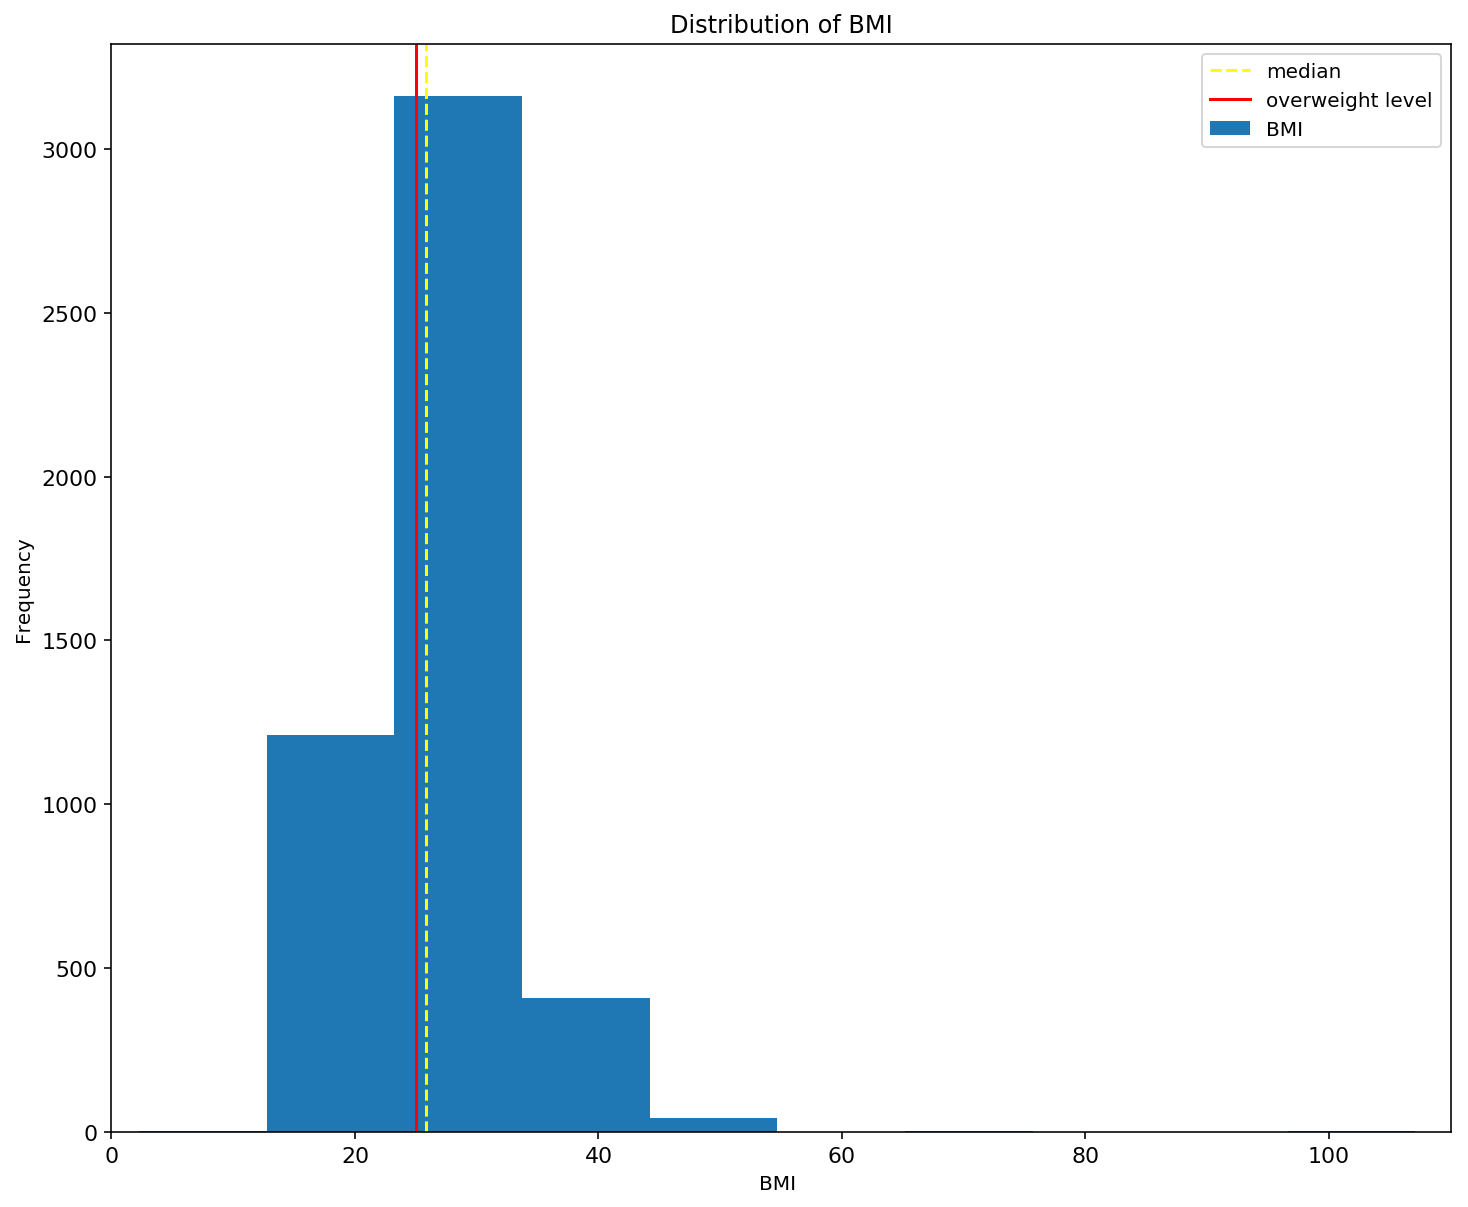

In [11]:
y.BMI.plot(kind='hist',  
            title='Distribution of BMI',
            fontsize=11, figsize=(12,10))
plt.xlabel('BMI ')
plt.xlim(0,110)
# add median and mean lines
plt.axvline(np.median(y.BMI), linestyle='dashed', c='yellow', label='median')
plt.axvline(25, c='red', label='overweight level')
plt.legend(loc='best');

The histogram shows a slight majority of the household surveyed falls over the overweight level.The median BMI is also above the overweight level.



<img src="https://wallpaperscraft.com/image/potatoes_fries_coke_ice_hamburger_bun_sesame_vegetables_tomatoes_onions_patty_cheese_ketchup_fast_food_77805_3840x2160.jpg" width="600">
 
 
 
Next we look at the the top 10 food choices among 50 highest BMI and compare them with the food choices among 50 lowest BMI. 
We will also look at the nutrients content of their food choices.



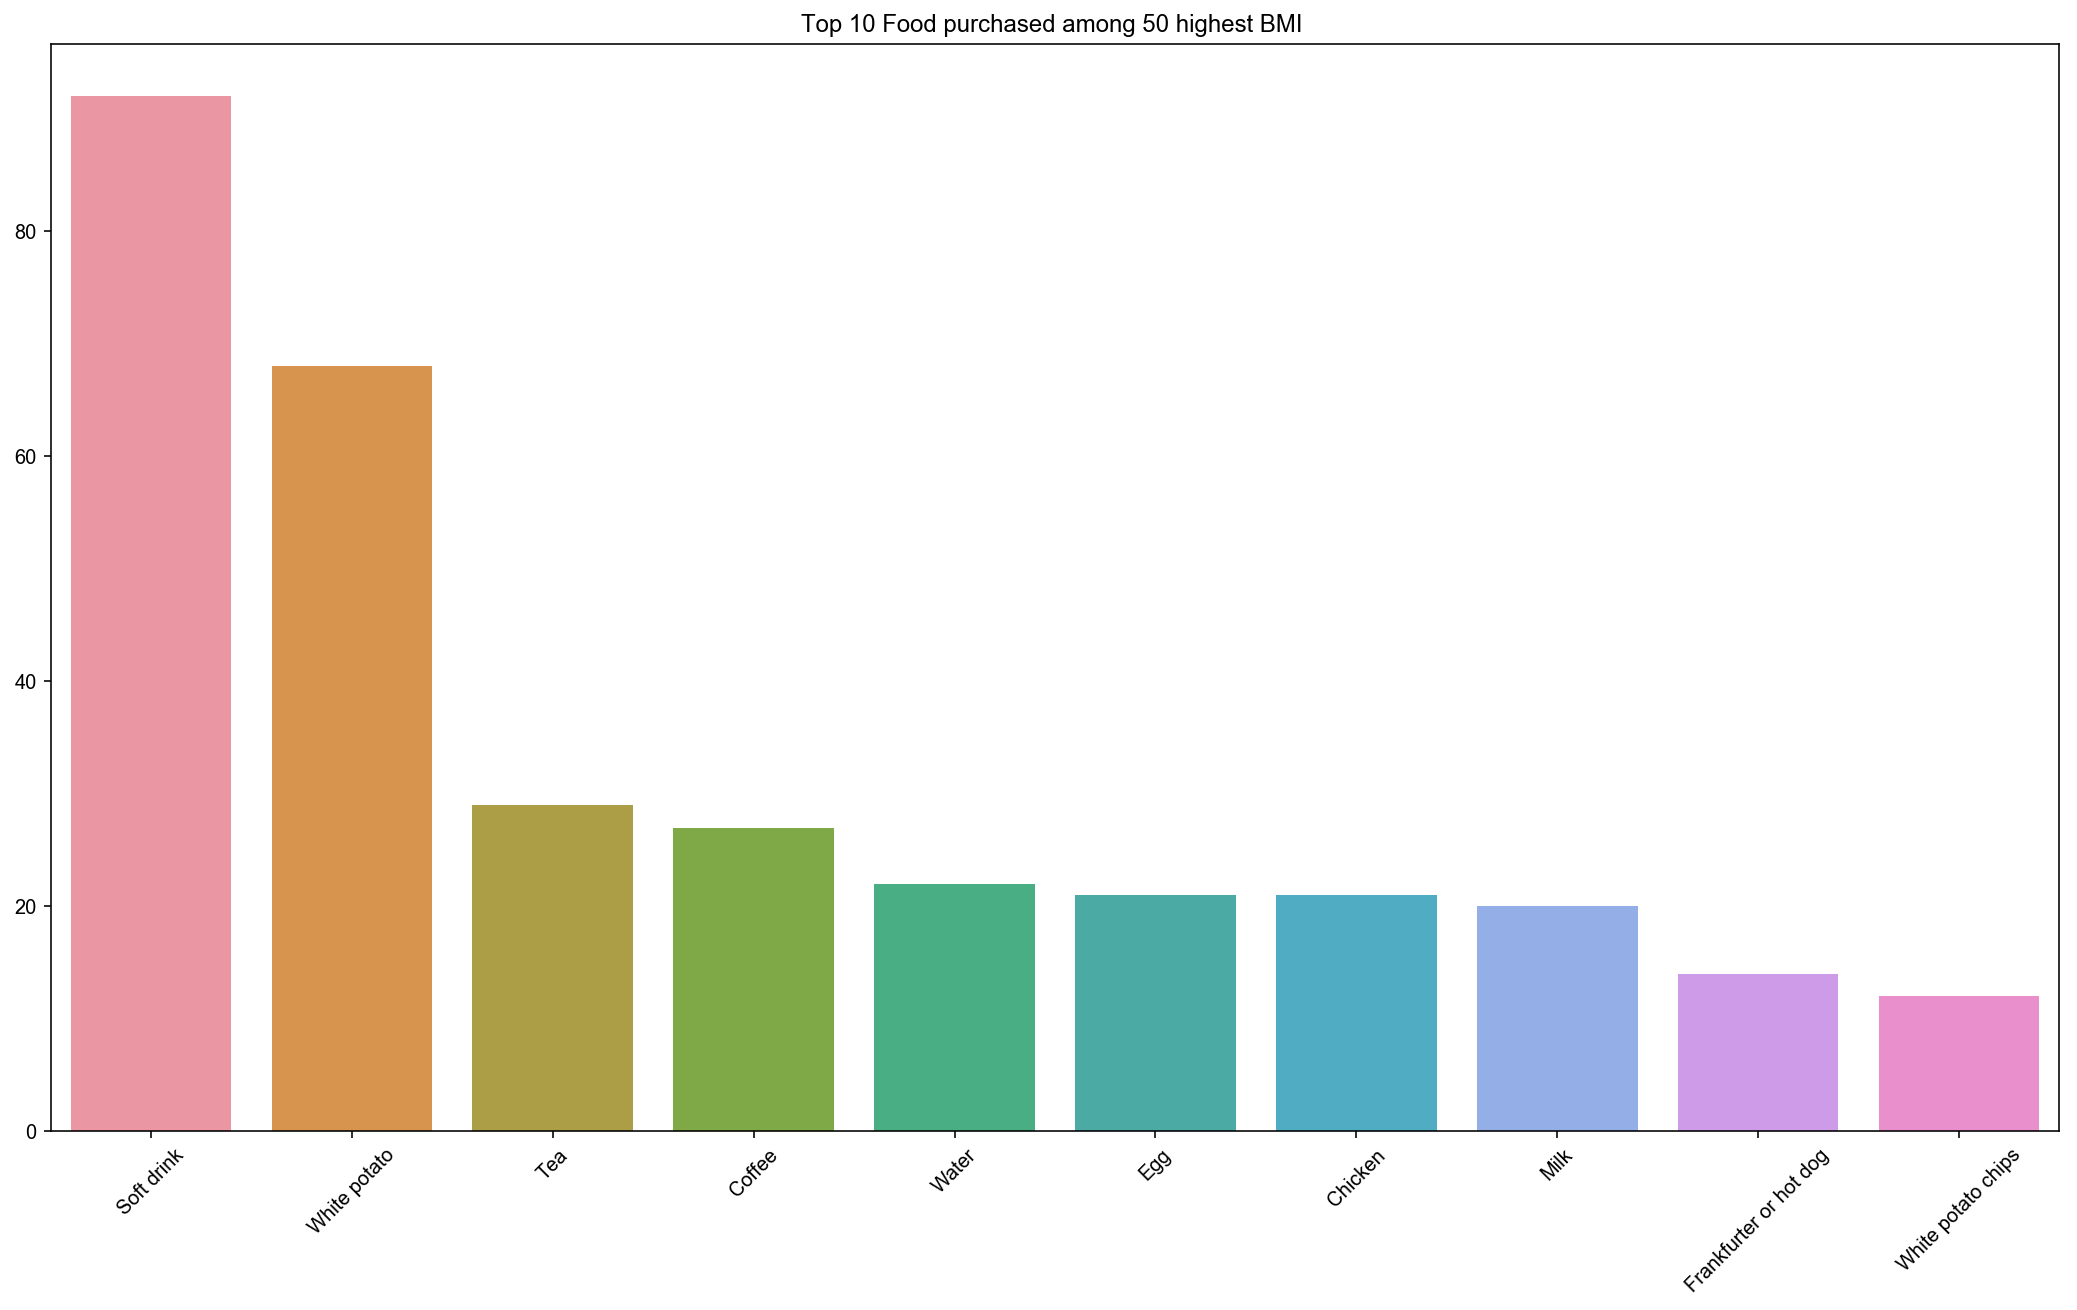

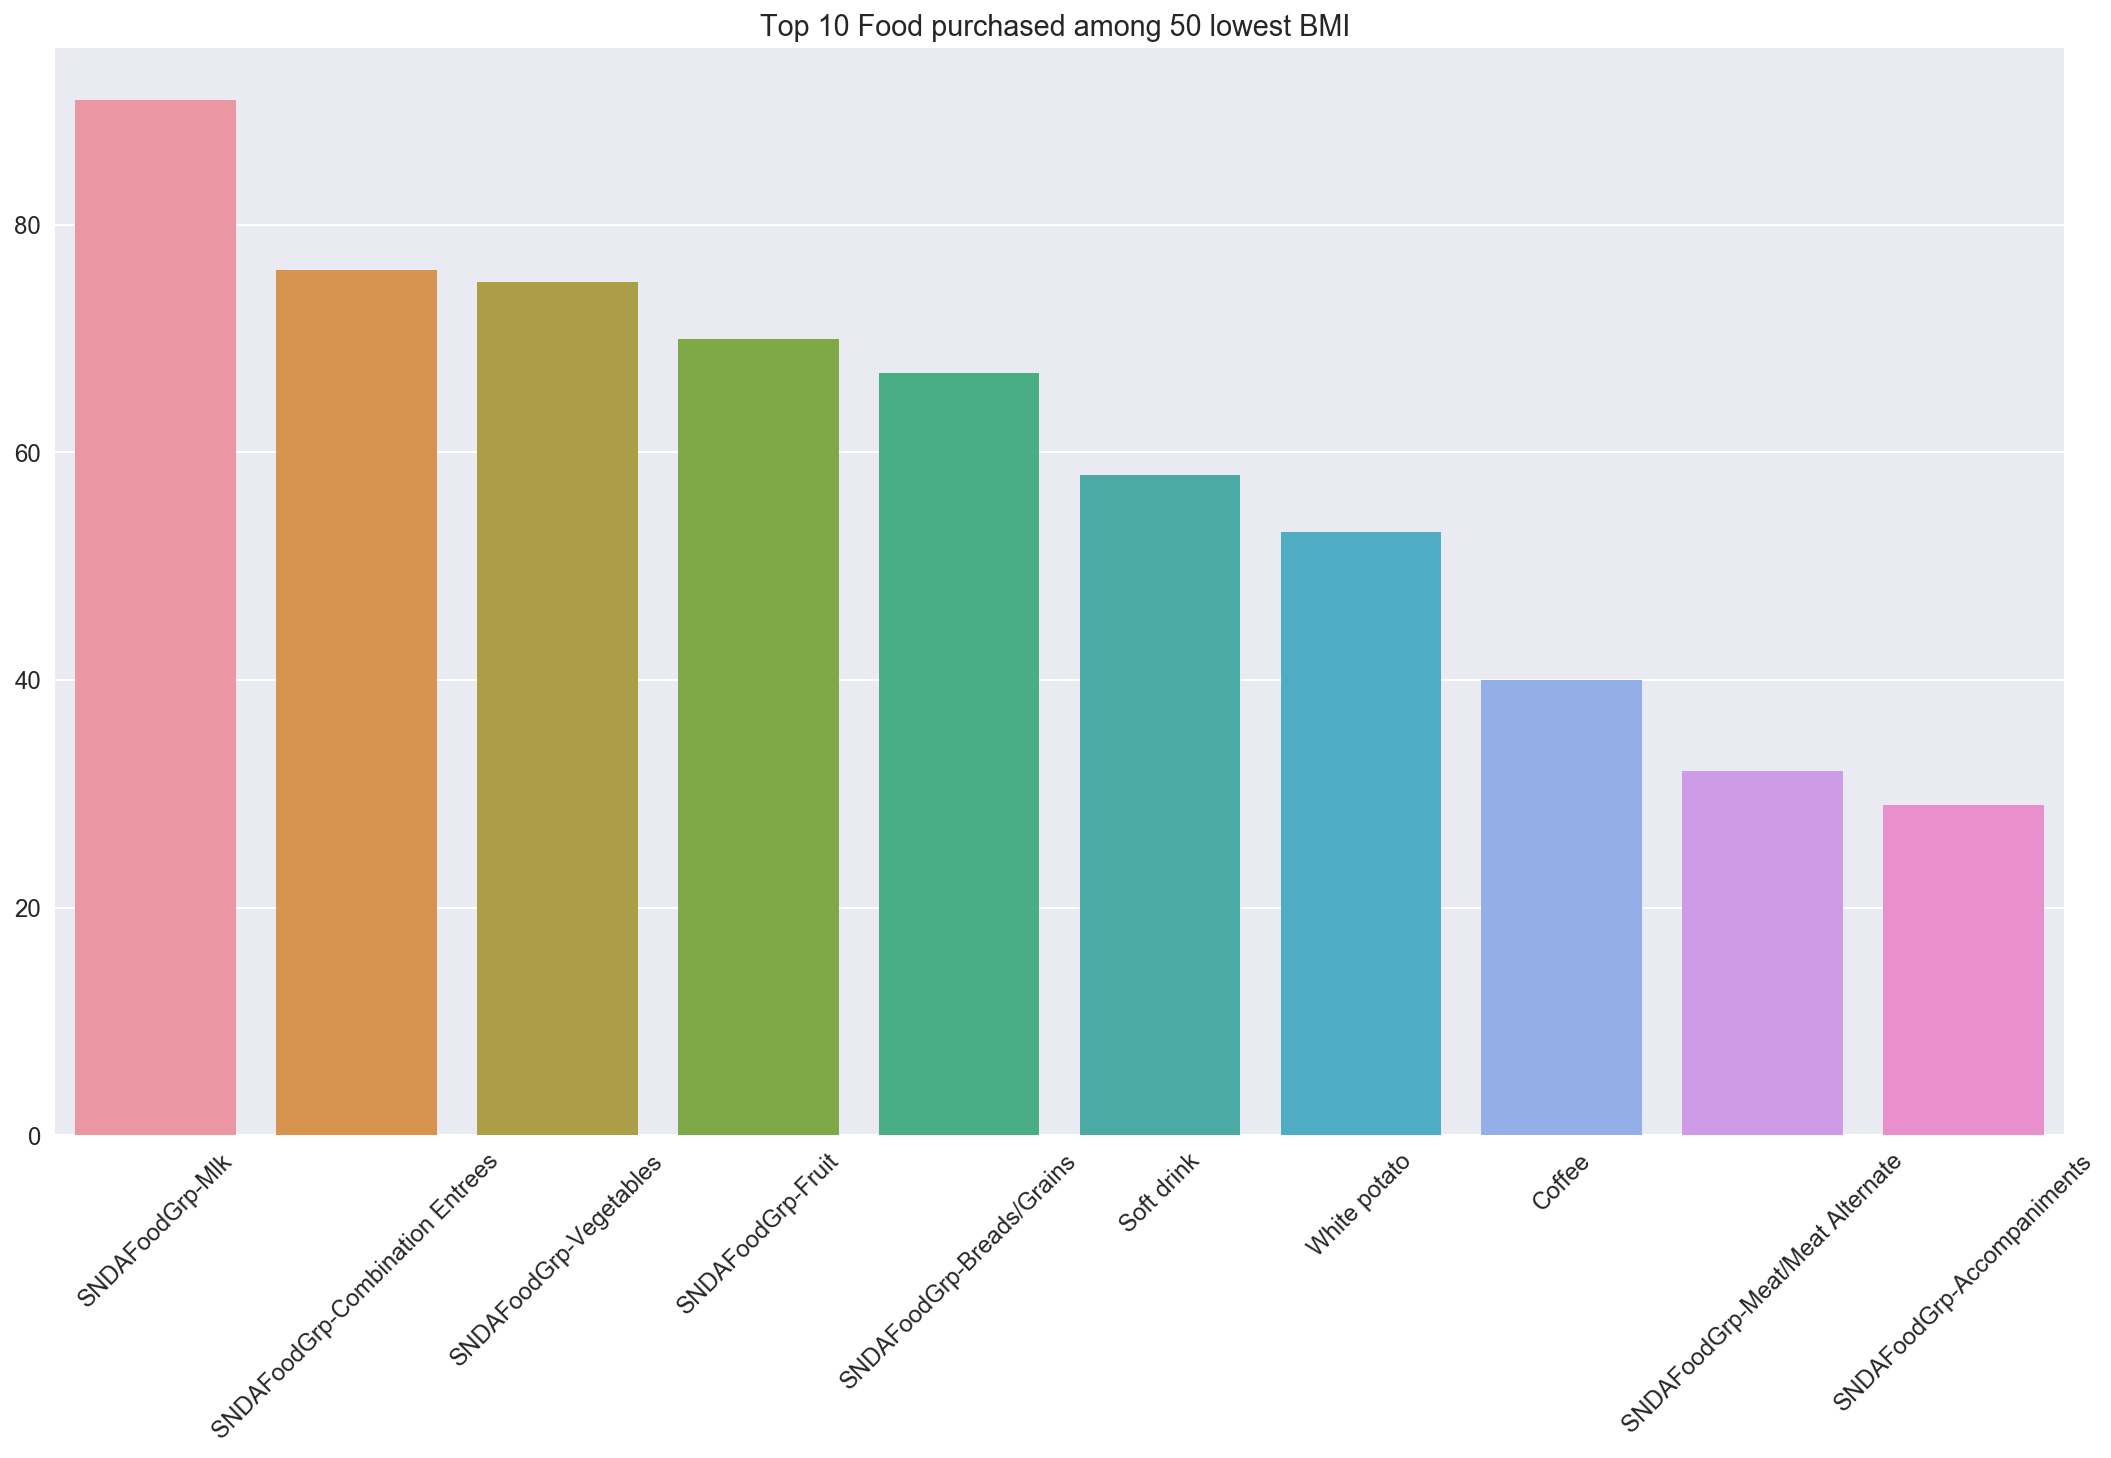

In [12]:
plot_bmi_food(food,y);

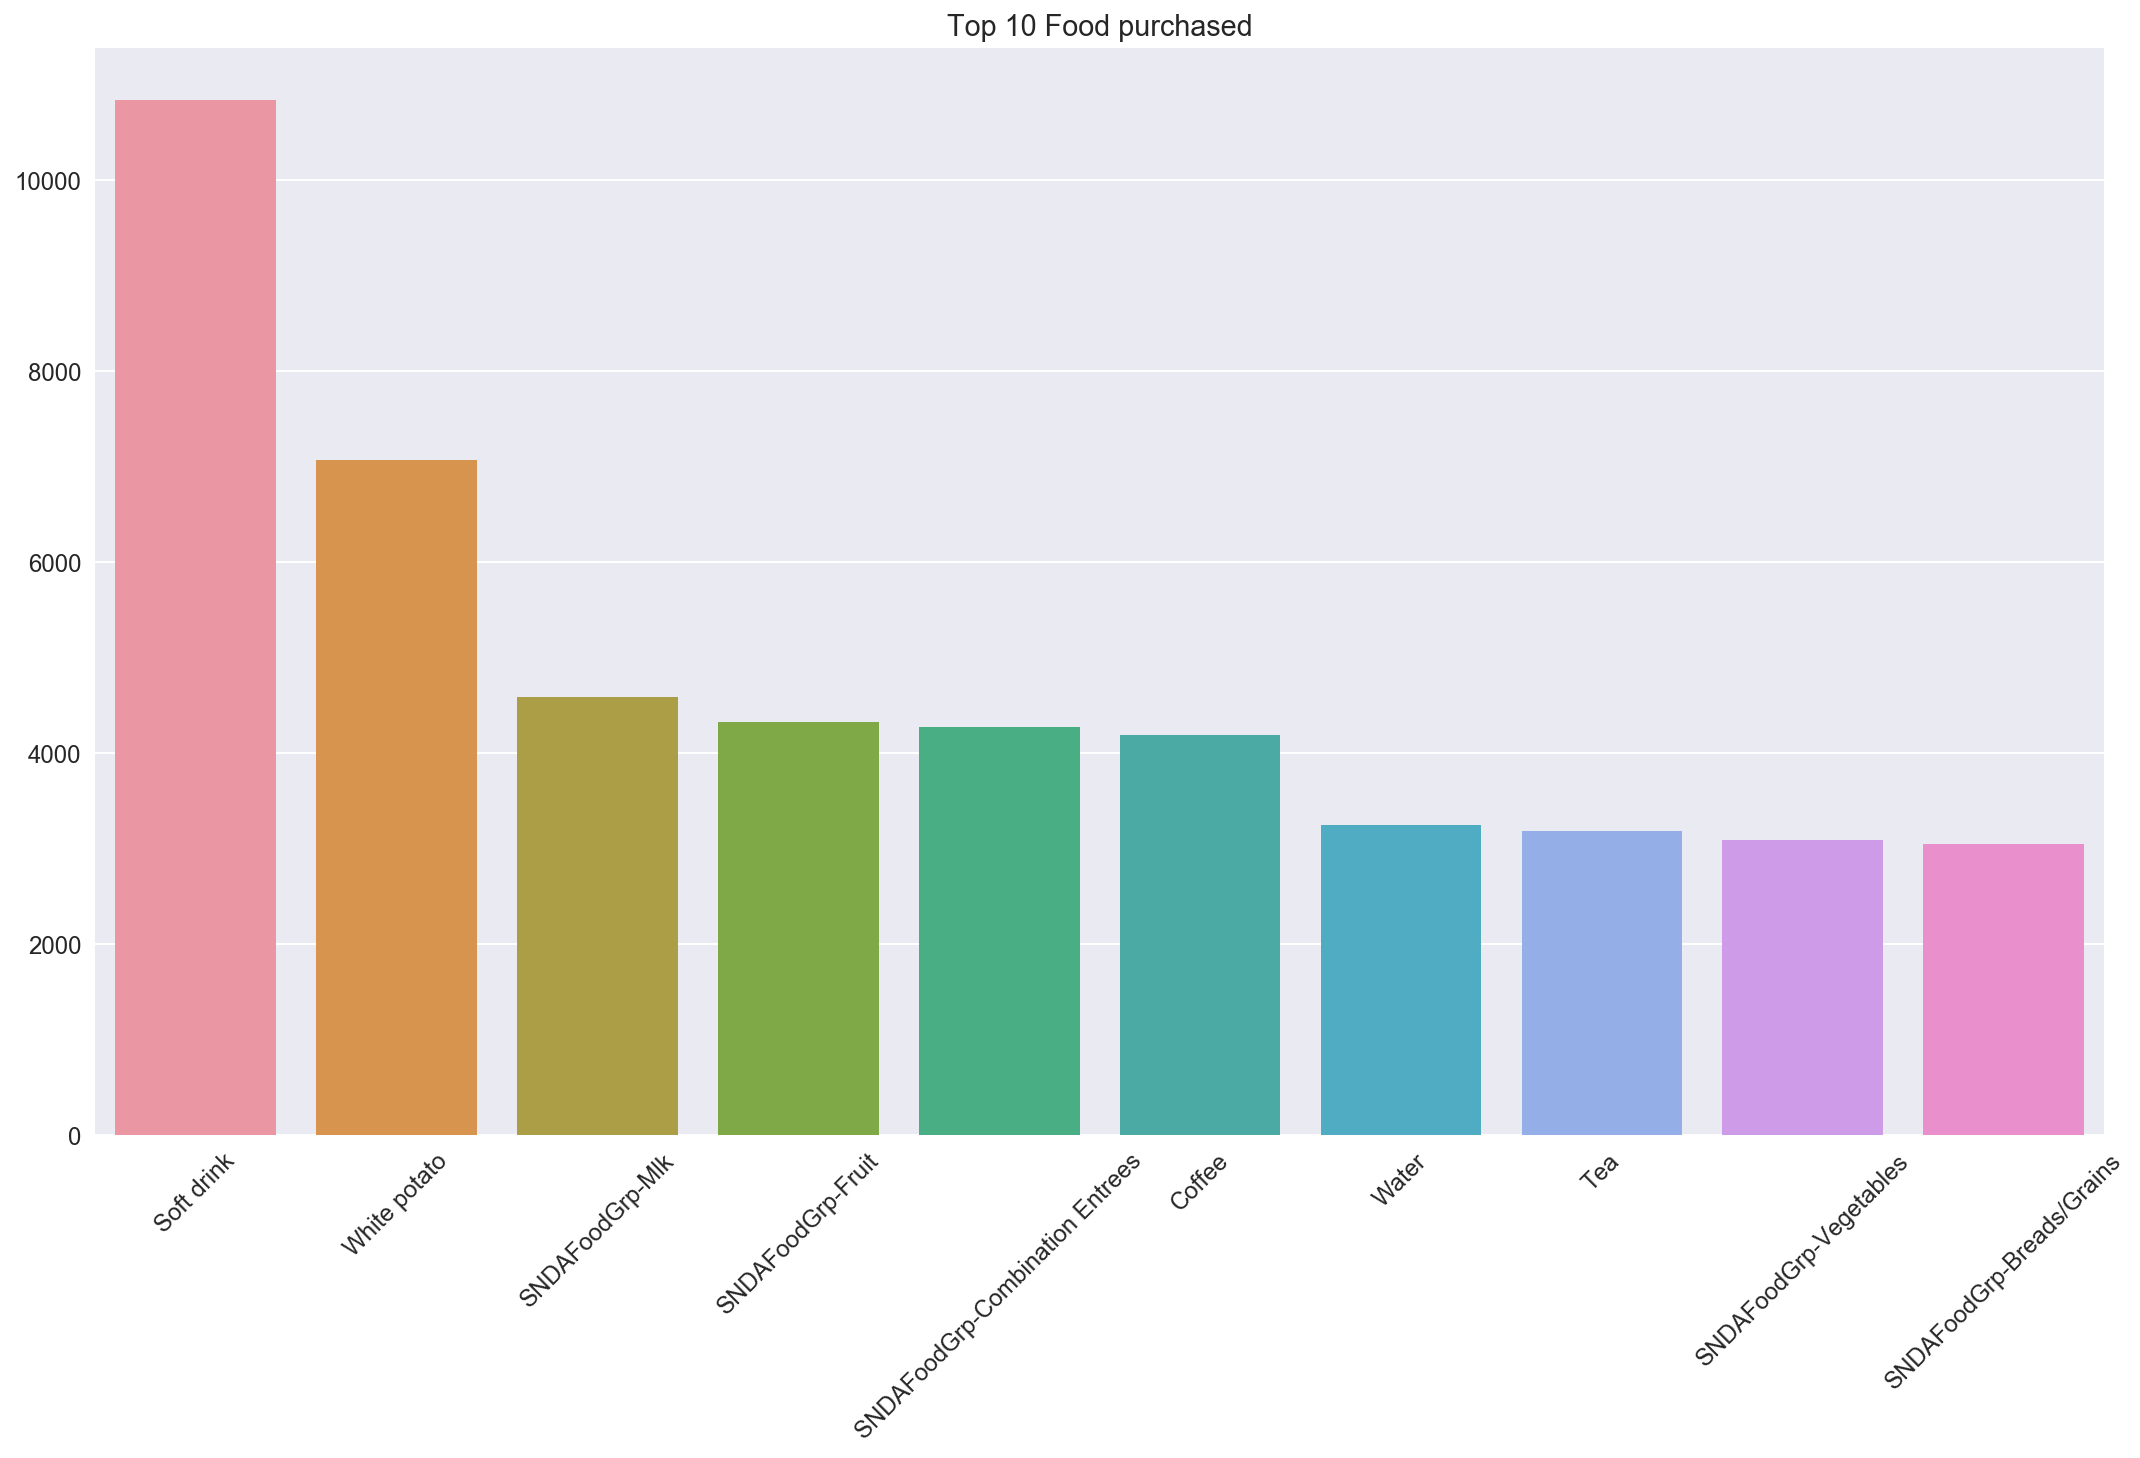

In [12]:
s=pd.DataFrame(food.food.value_counts().head(10))
plt.figure(figsize=(18,10))
plt.xticks(rotation=45)
plt.title('Top 10 Food purchased')
sns.set(font_scale=1.2)
sns.barplot(data=s.T);

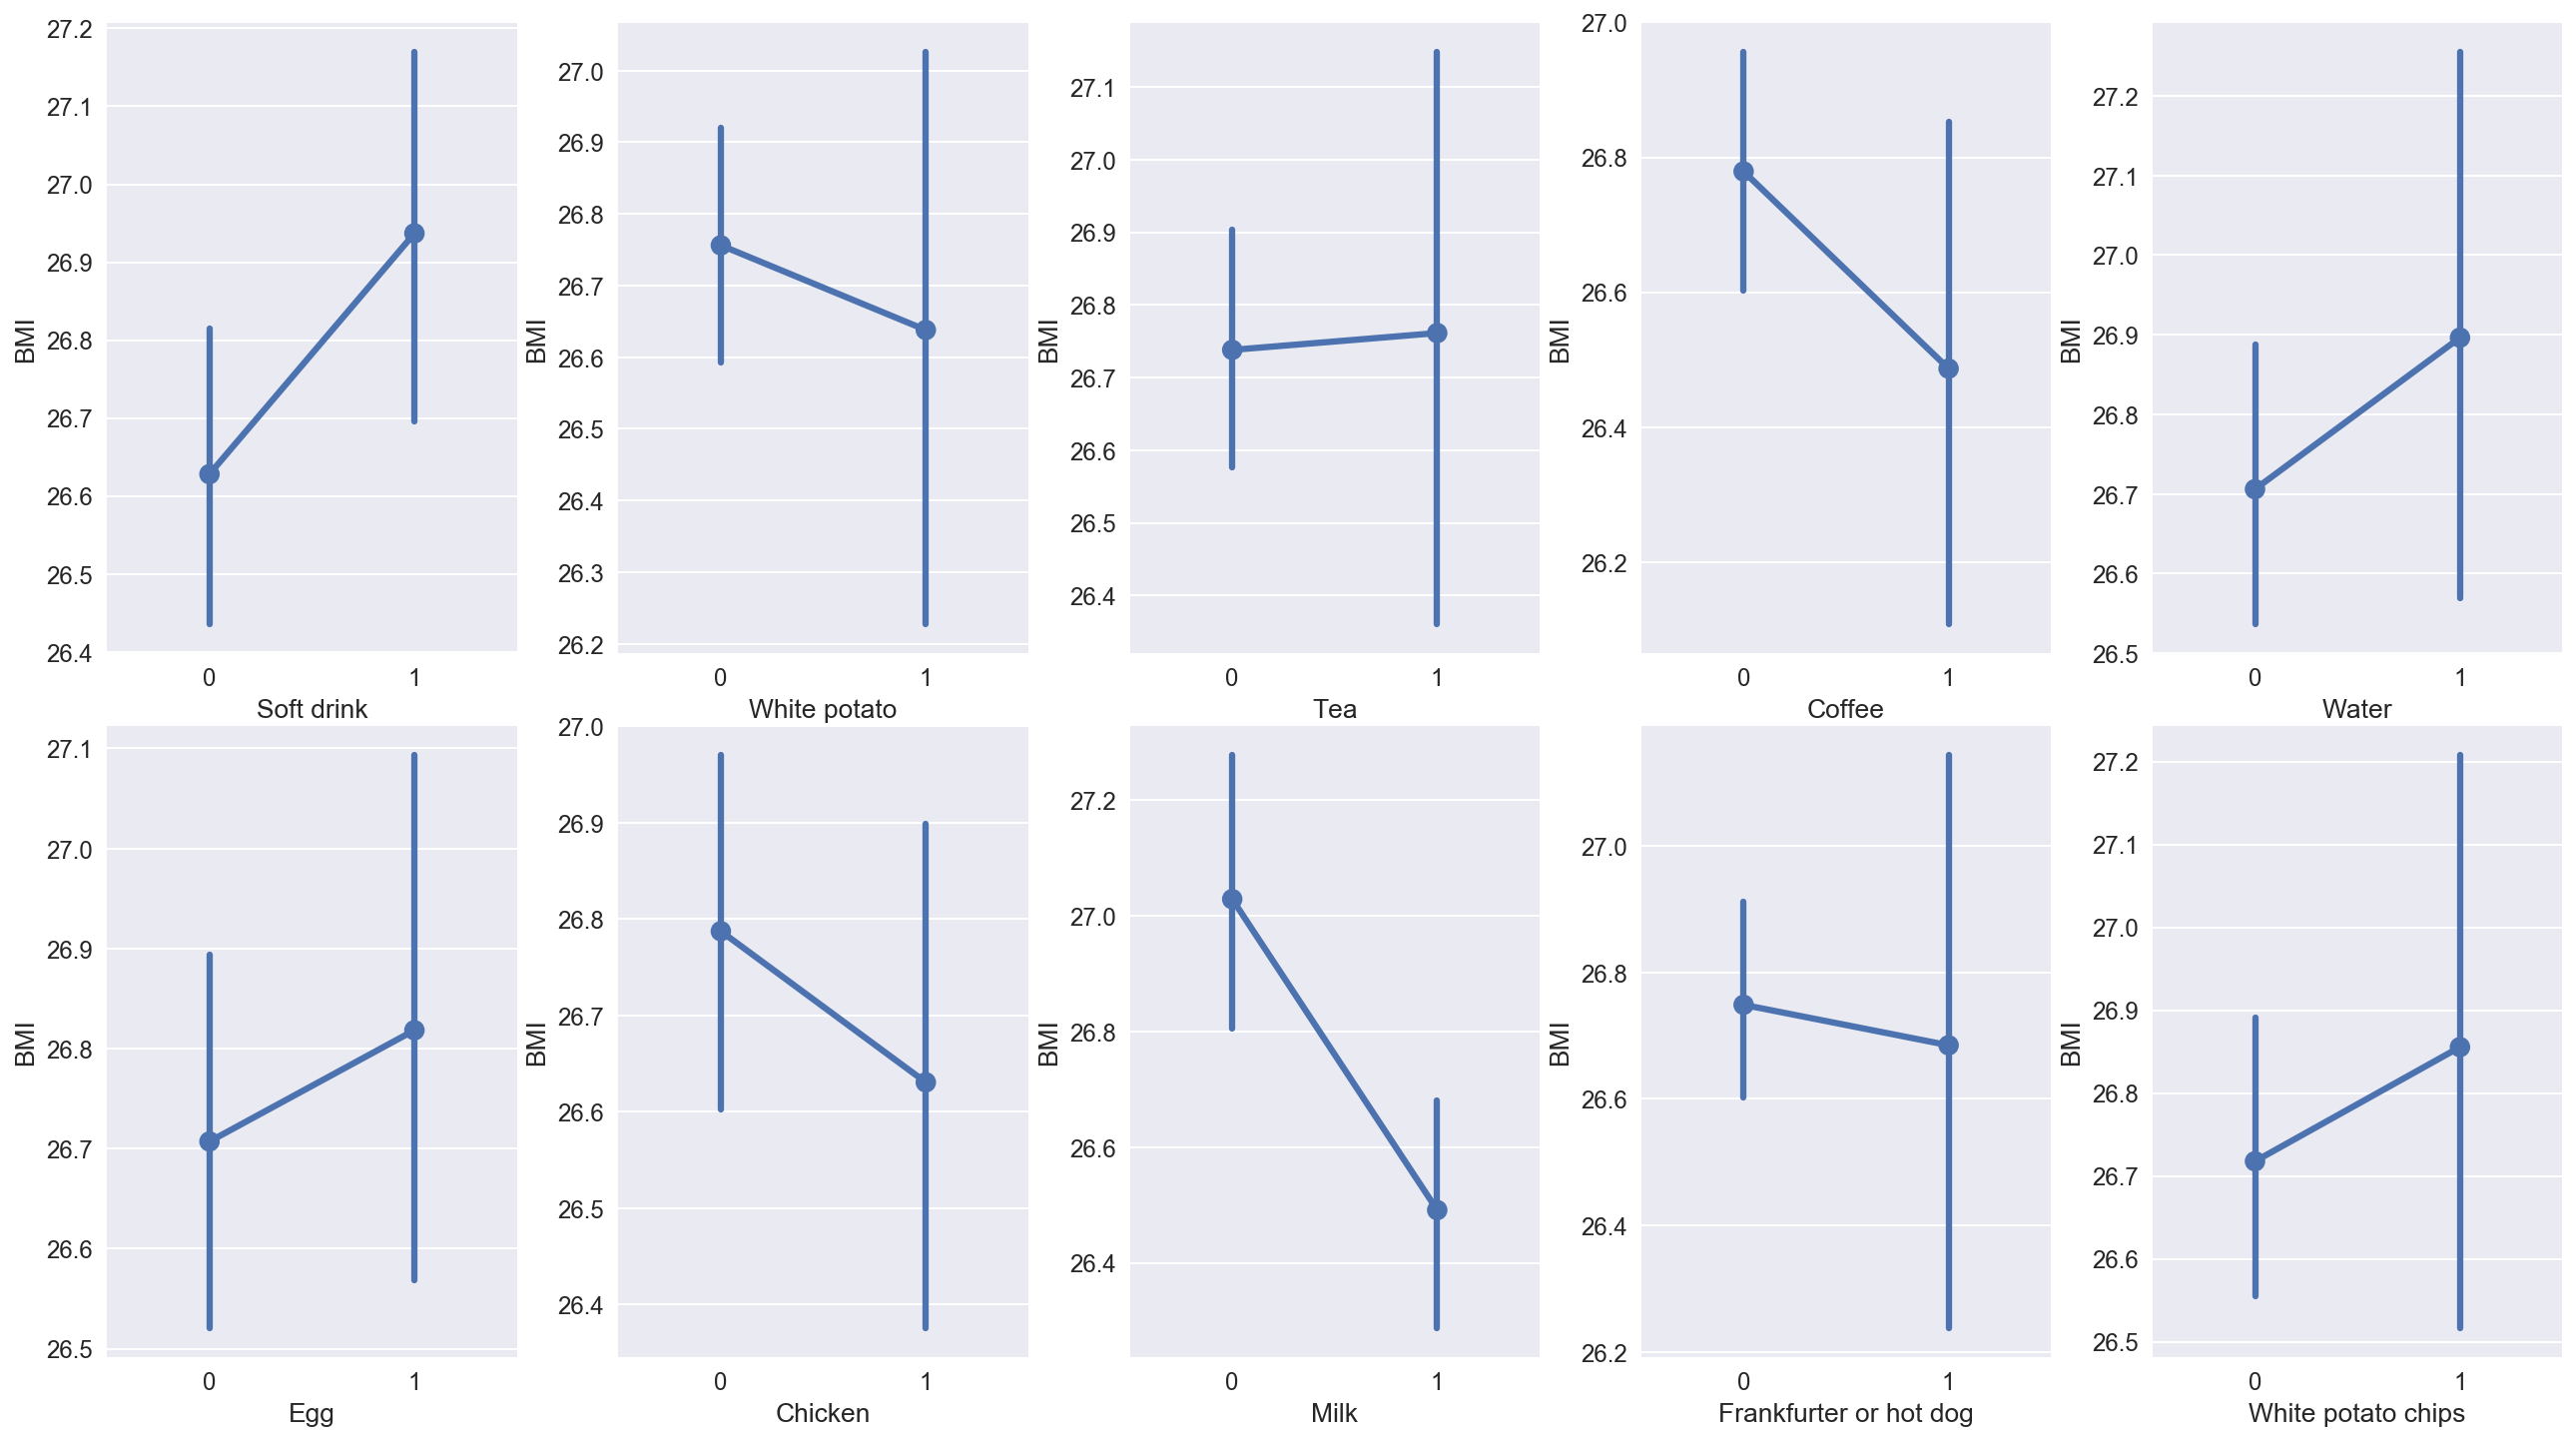

In [13]:
fig, ax =plt.subplots(2,5,figsize=(18,10))
fig.tight_layout()
#fig = plt.figure(figsize=(18,10))
sns.pointplot(X['Soft drink'],y.BMI, ax=ax[0,0])
sns.pointplot(X['White potato'],y.BMI, ax=ax[0,1])
sns.pointplot(X['Tea'],y.BMI, ax=ax[0,2])
sns.pointplot(X['Coffee'],y.BMI, ax=ax[0,3])
sns.pointplot(X['Water'],y.BMI, ax=ax[0,4])
sns.pointplot(X['Egg'],y.BMI, ax=ax[1,0])
sns.pointplot(X['Chicken'],y.BMI, ax=ax[1,1])
sns.pointplot(X['Milk'],y.BMI, ax=ax[1,2])
sns.pointplot(X['Frankfurter or hot dog'],y.BMI, ax=ax[1,3])
sns.pointplot(X['White potato chips'],y.BMI, ax=ax[1,4])
fig.show();

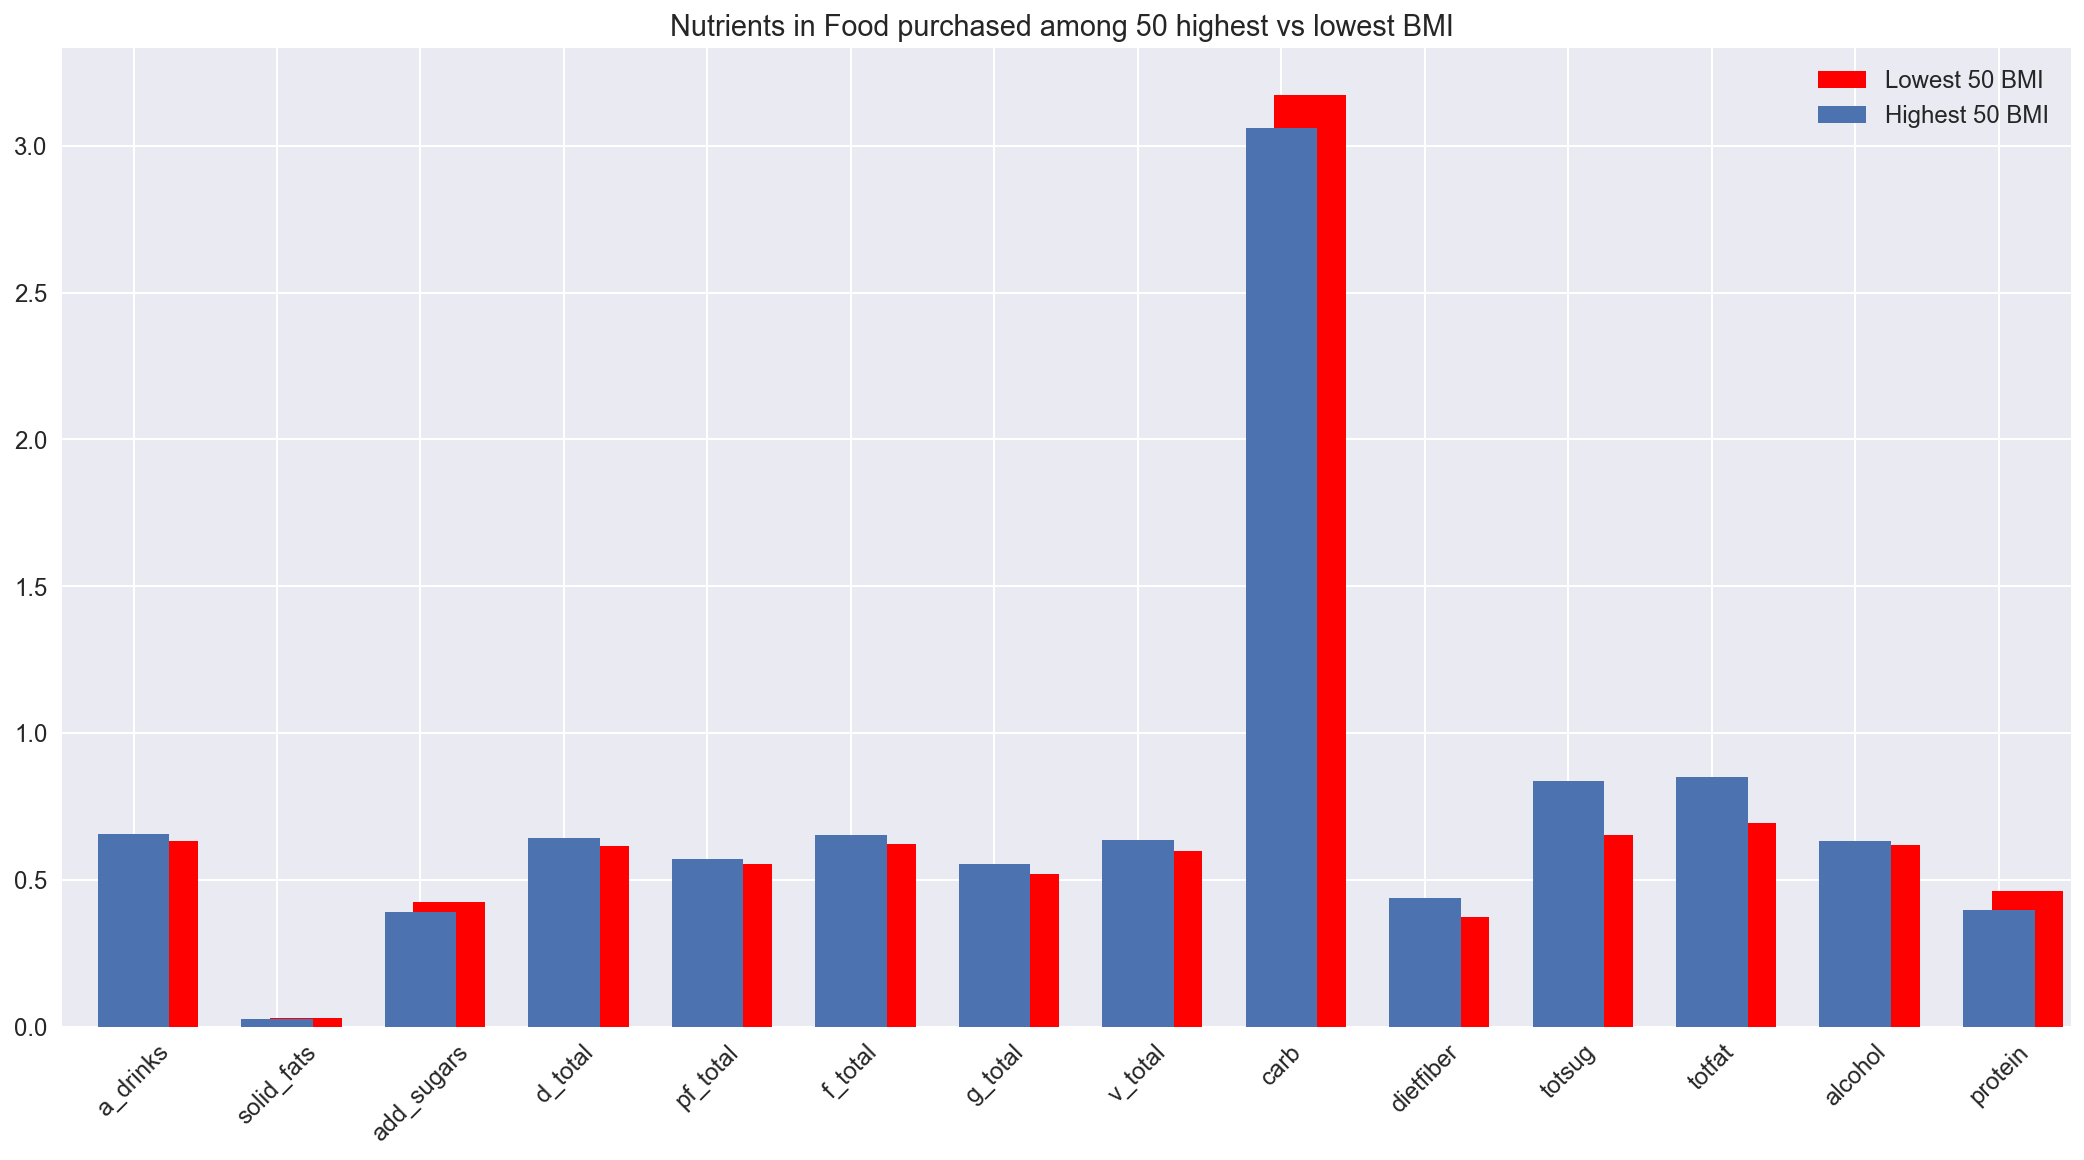

In [14]:
plot_nutrient(X,y);

Based of the graph above, one striking observation is the fact that the top 50 BMI group consumed way more soft drinks than the lowest 50 BMI group.
Another observation is that carbohydrates consumption is much higher compared to the rest of the nutrients. Consumption of protien is low in comparison. In fact the comsumption of sugar is higher than protein.

Next we look at the distribution score of food purchased followed by the distribution of overall income compared to the distribution income that made healthier food choices.

In [209]:
%%capture
hh=HHPreprocessor()
X1=hh.transform(dfd)
y1=hh.target_score(dfa,dfb,dfd)

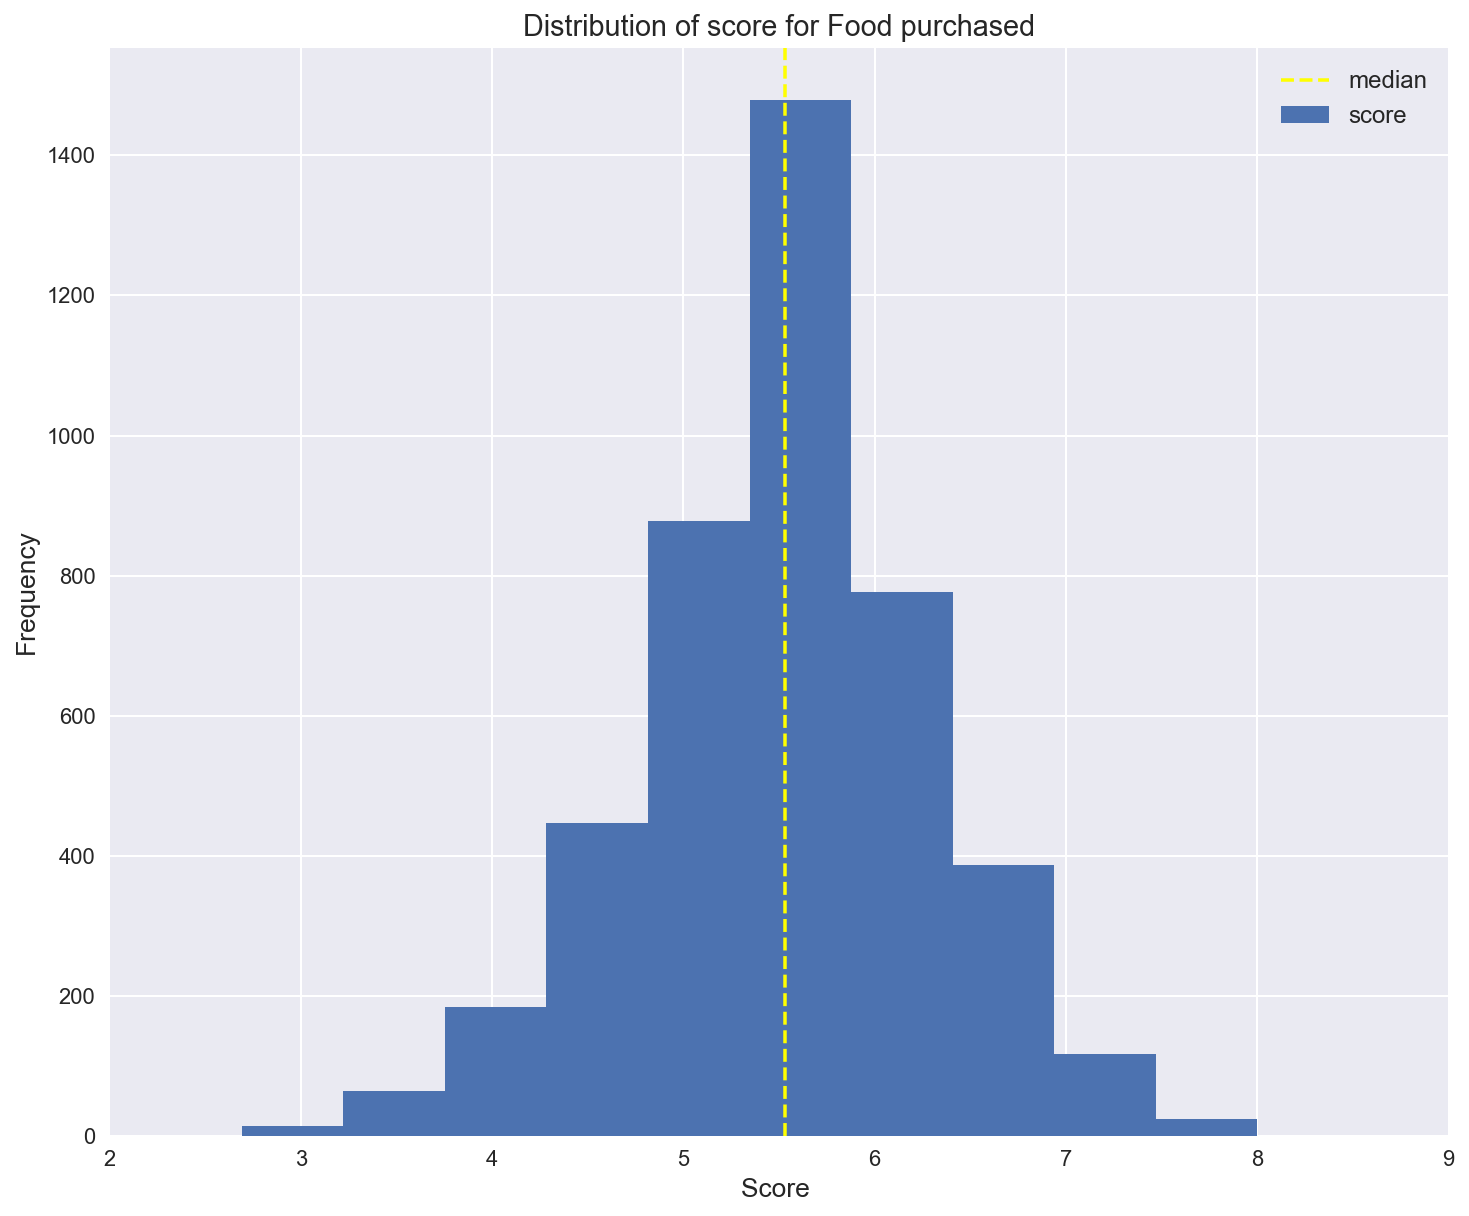

In [18]:
y1.plot(kind='hist', #bins=range(1, 110, 10), 
               title='Distribution of score for Food purchased',
               fontsize=11, figsize=(12,10))#color='blue',
plt.xlabel('Score ')
plt.xlim(2,9)
# add median and mean lines
plt.axvline(y1.median(), linestyle='dashed', c='yellow', label='median')
#plt.axvline(24.9, #linestyle='dotted', 
            #c='red', label='overweight level')
plt.legend(loc='best');

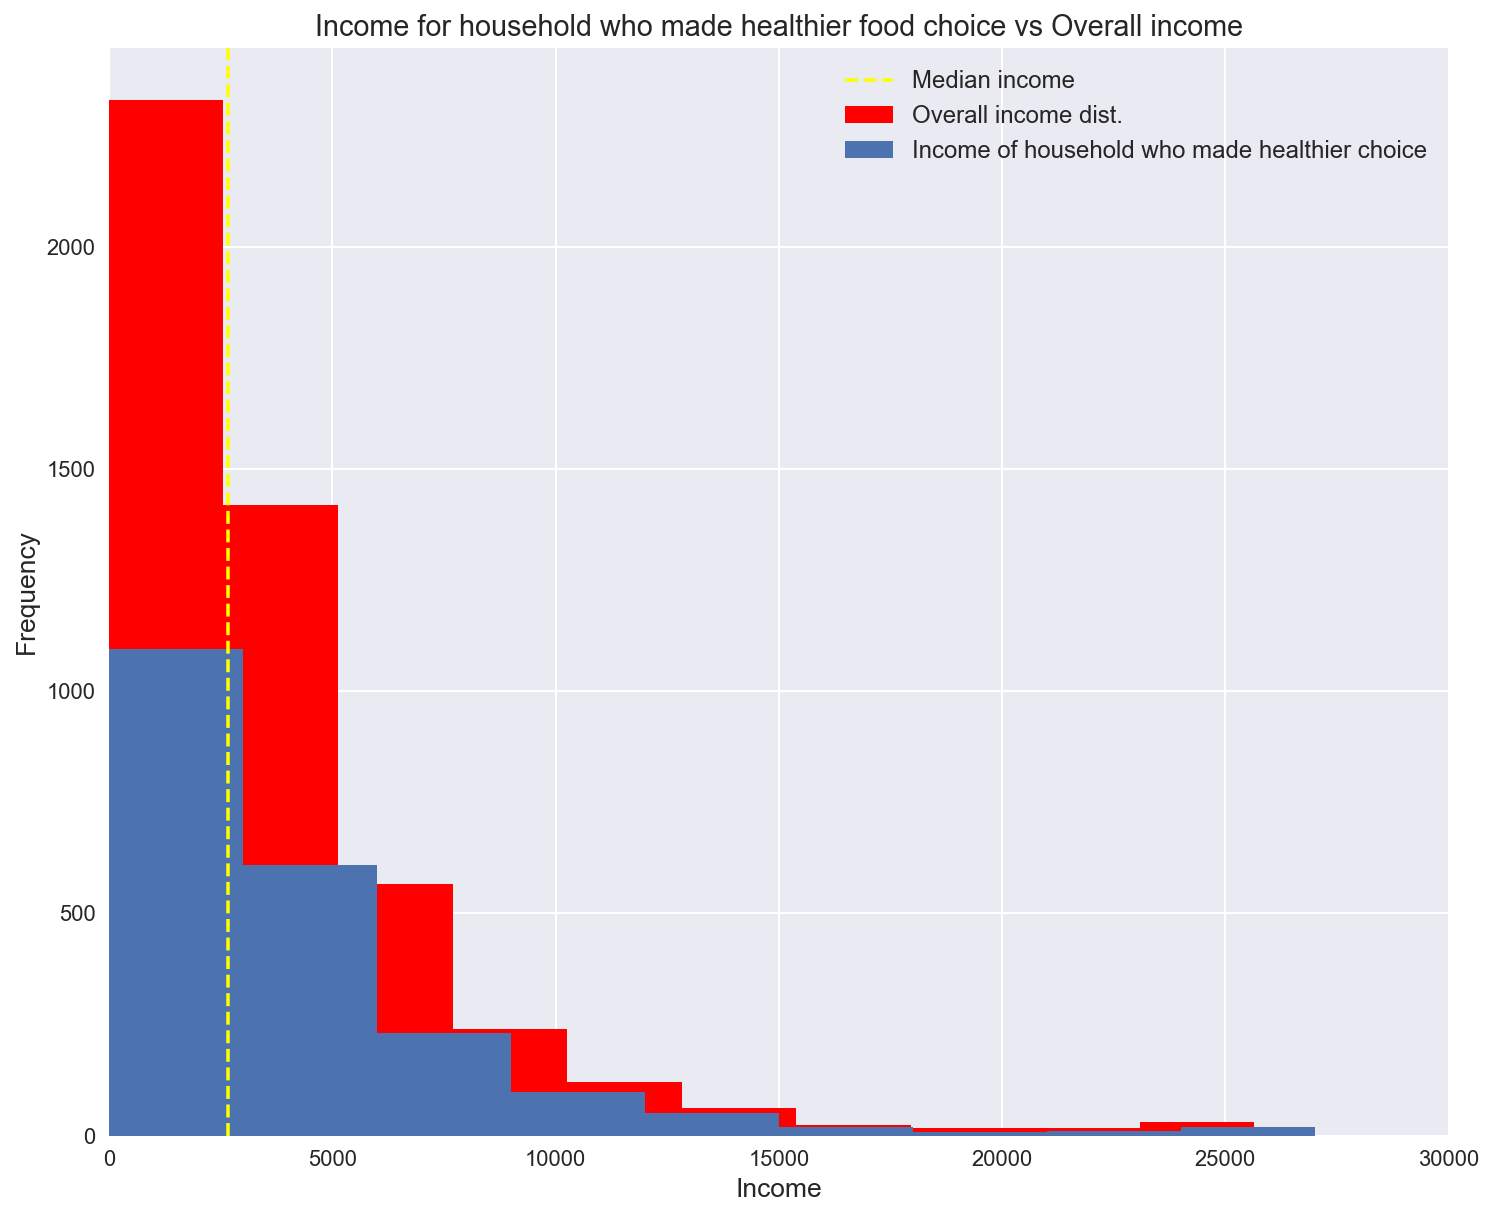

In [19]:
y2=y1[y1<y1.median()]
y2_index=y2.index
income=X1.inchhavg_r
income_health=X1.inchhavg_r[X.index.isin(y2_index)]
ax=income.plot(kind='hist',color='red')
income_health.plot(kind='hist', bins=range(1, 30000, 3000), 
               title='Income for household who made healthier food choice vs Overall income',
               fontsize=11,figsize=(12,10),ax=ax)
plt.xlabel('Income')
plt.xlim(10,30000)
# add median and mean lines
plt.axvline(income.median(), linestyle='dashed', c='yellow', label='median')
#plt.axvline(24.9, #linestyle='dotted', 
            #c='red', label='overweight level')
plt.legend(['Median income','Overall income dist.','Income of household who made healthier choice'],loc='best');

In the survey, respondents were asked to assess their dietary choices and rate them from poor,fair, good, very good and excellent. Total of 3236 rated their choices good and above.

We compared them with their actual purchase. 

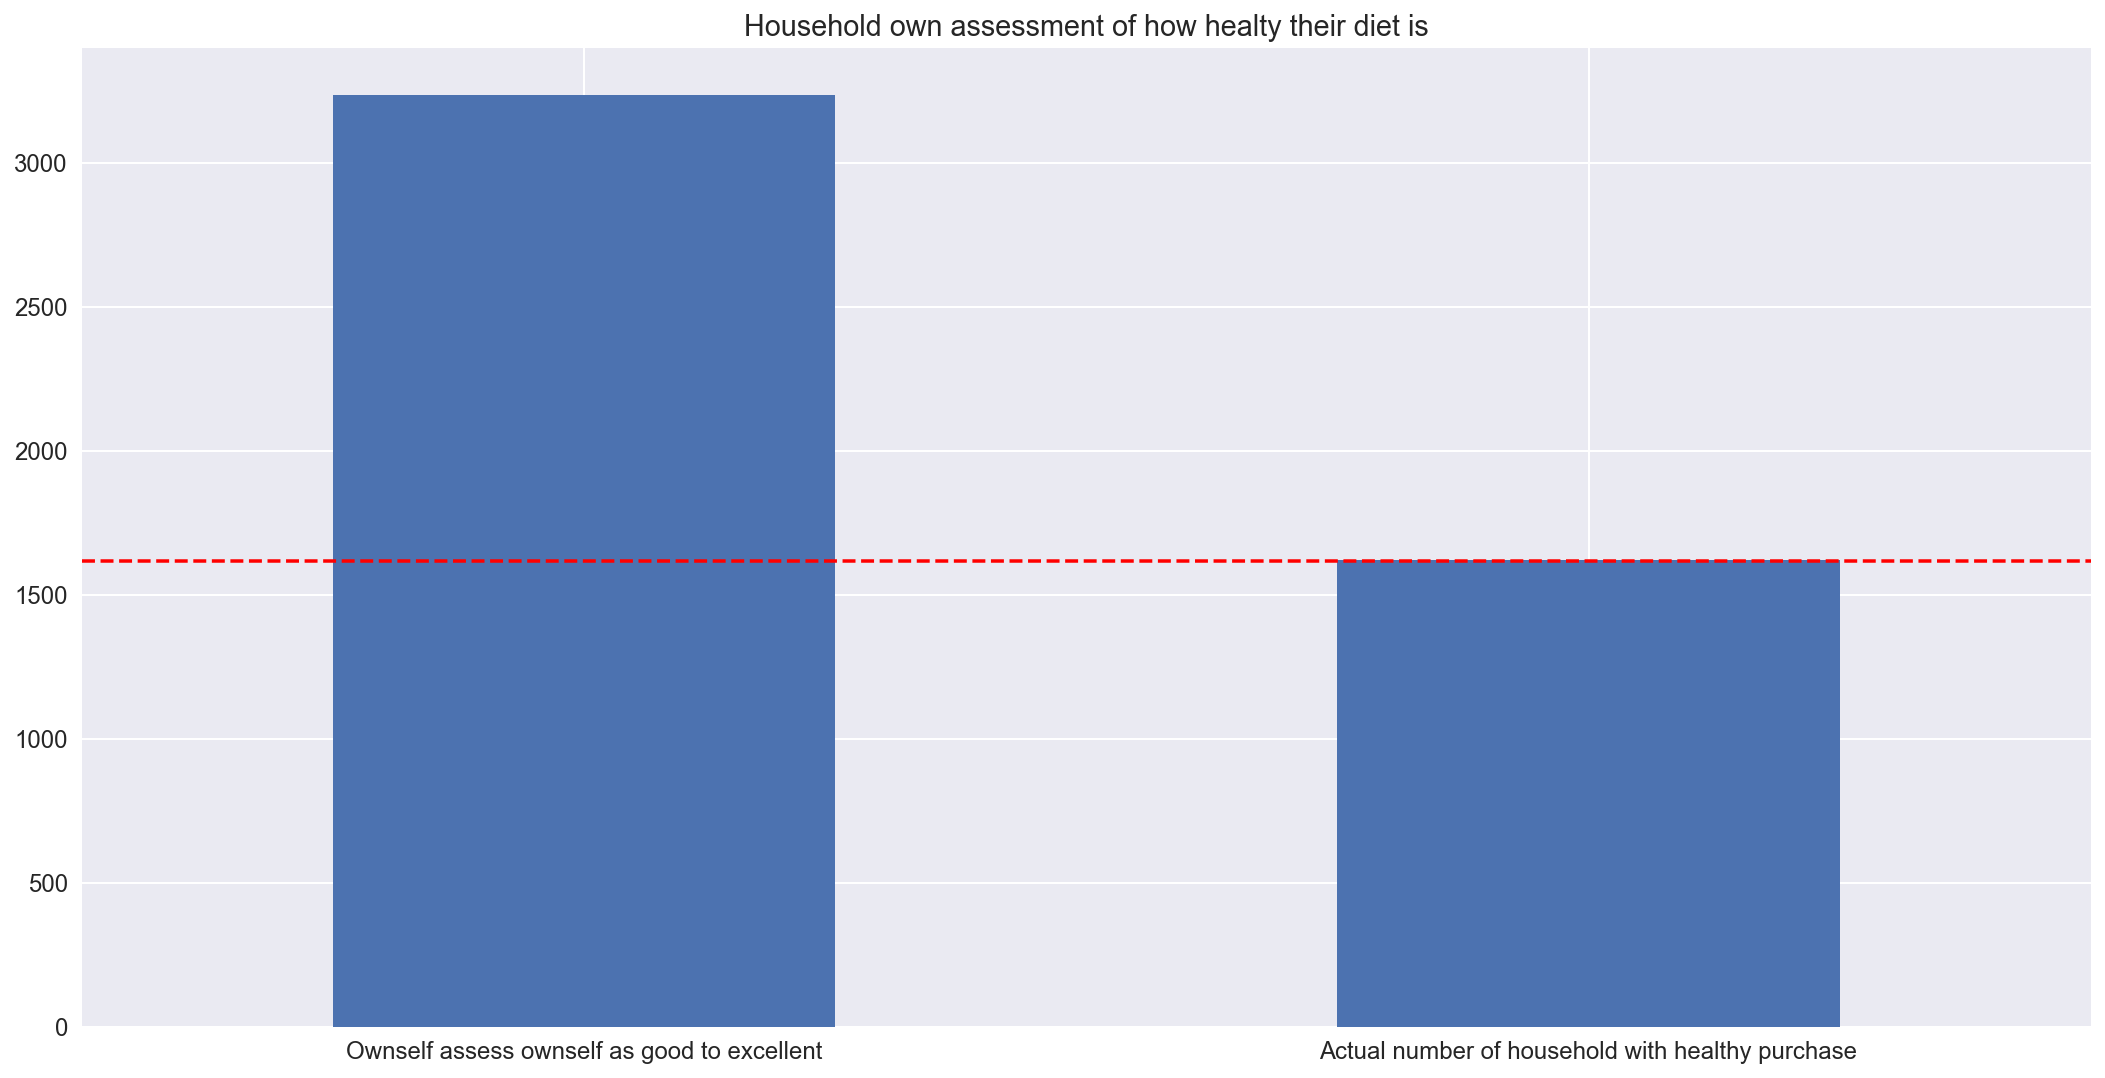

In [20]:
dietstatus=X1.dietstatuspr[X1.dietstatuspr<=3]
dietstatus_int=dietstatus.index
actual=y1[y1<y1.mean()]
a=actual[actual.index.isin(dietstatus_int)]
c=pd.Series([dietstatus.count(),a.count()])
plt.axhline(dietstatus.count()/2, linestyle='dashed', c='red', label='median')
ax=plt.subplot()
c.plot(kind='bar',figsize=(18,9),fontsize=12,
                title='Household own assessment of how healty their diet is',rot=360)
ax.set_xticklabels(labels=['Ownself assess ownself as good to excellent',
                           'Actual number of household with healthy purchase']);



<img src="https://cdn.foe.co.uk/sites/default/files/styles/body_text_image/public/media/images/casserole.jpg?itok=tjjPwvnI" width="700">
 
 
 
 
 ## Modelling for BMI lever prediction
As I am predicting a binary variable- whether the BMI will be above or below 25,I will use a classifier model.
I create a new binary variable that is true when the BMI is below 25.


### Logistic Regression- Default parameters
The calculated baseline is 0.58. I decided to start off using Logistic Regression.From the resulting regression coefficients perhaps more insights can be obtain.  

The food purchased, together with their nutrients value are used as features. The features can be obtain by using the BmiPrecessor class created. Dataframes  from the files (faps_fahnutrients.csv,faps_fafhnutrient_puf.csv, faps_individual_puf.csv) are used.

Once process,the features and target will be splited to training and test sets.

In [183]:
%%capture
bmi=BmiPreprocessor()
X=bmi.transform(dfa,dfb,dfc);
y=bmi.get_bmi(dfc);

In [184]:
X.shape

(4826, 2000)

In [185]:
y=y.BMI<25

In [23]:
y.value_counts()

False    2827
True     1999
Name: BMI, dtype: int64

In [24]:
baseline=y.value_counts()
baseline=float(baseline[0])/(baseline[0]+baseline[1])
baseline

0.5857853294653957

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [188]:
seed=17
ss = StandardScaler()
lr = LogisticRegression(random_state=seed)
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])

In [189]:
lr_pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

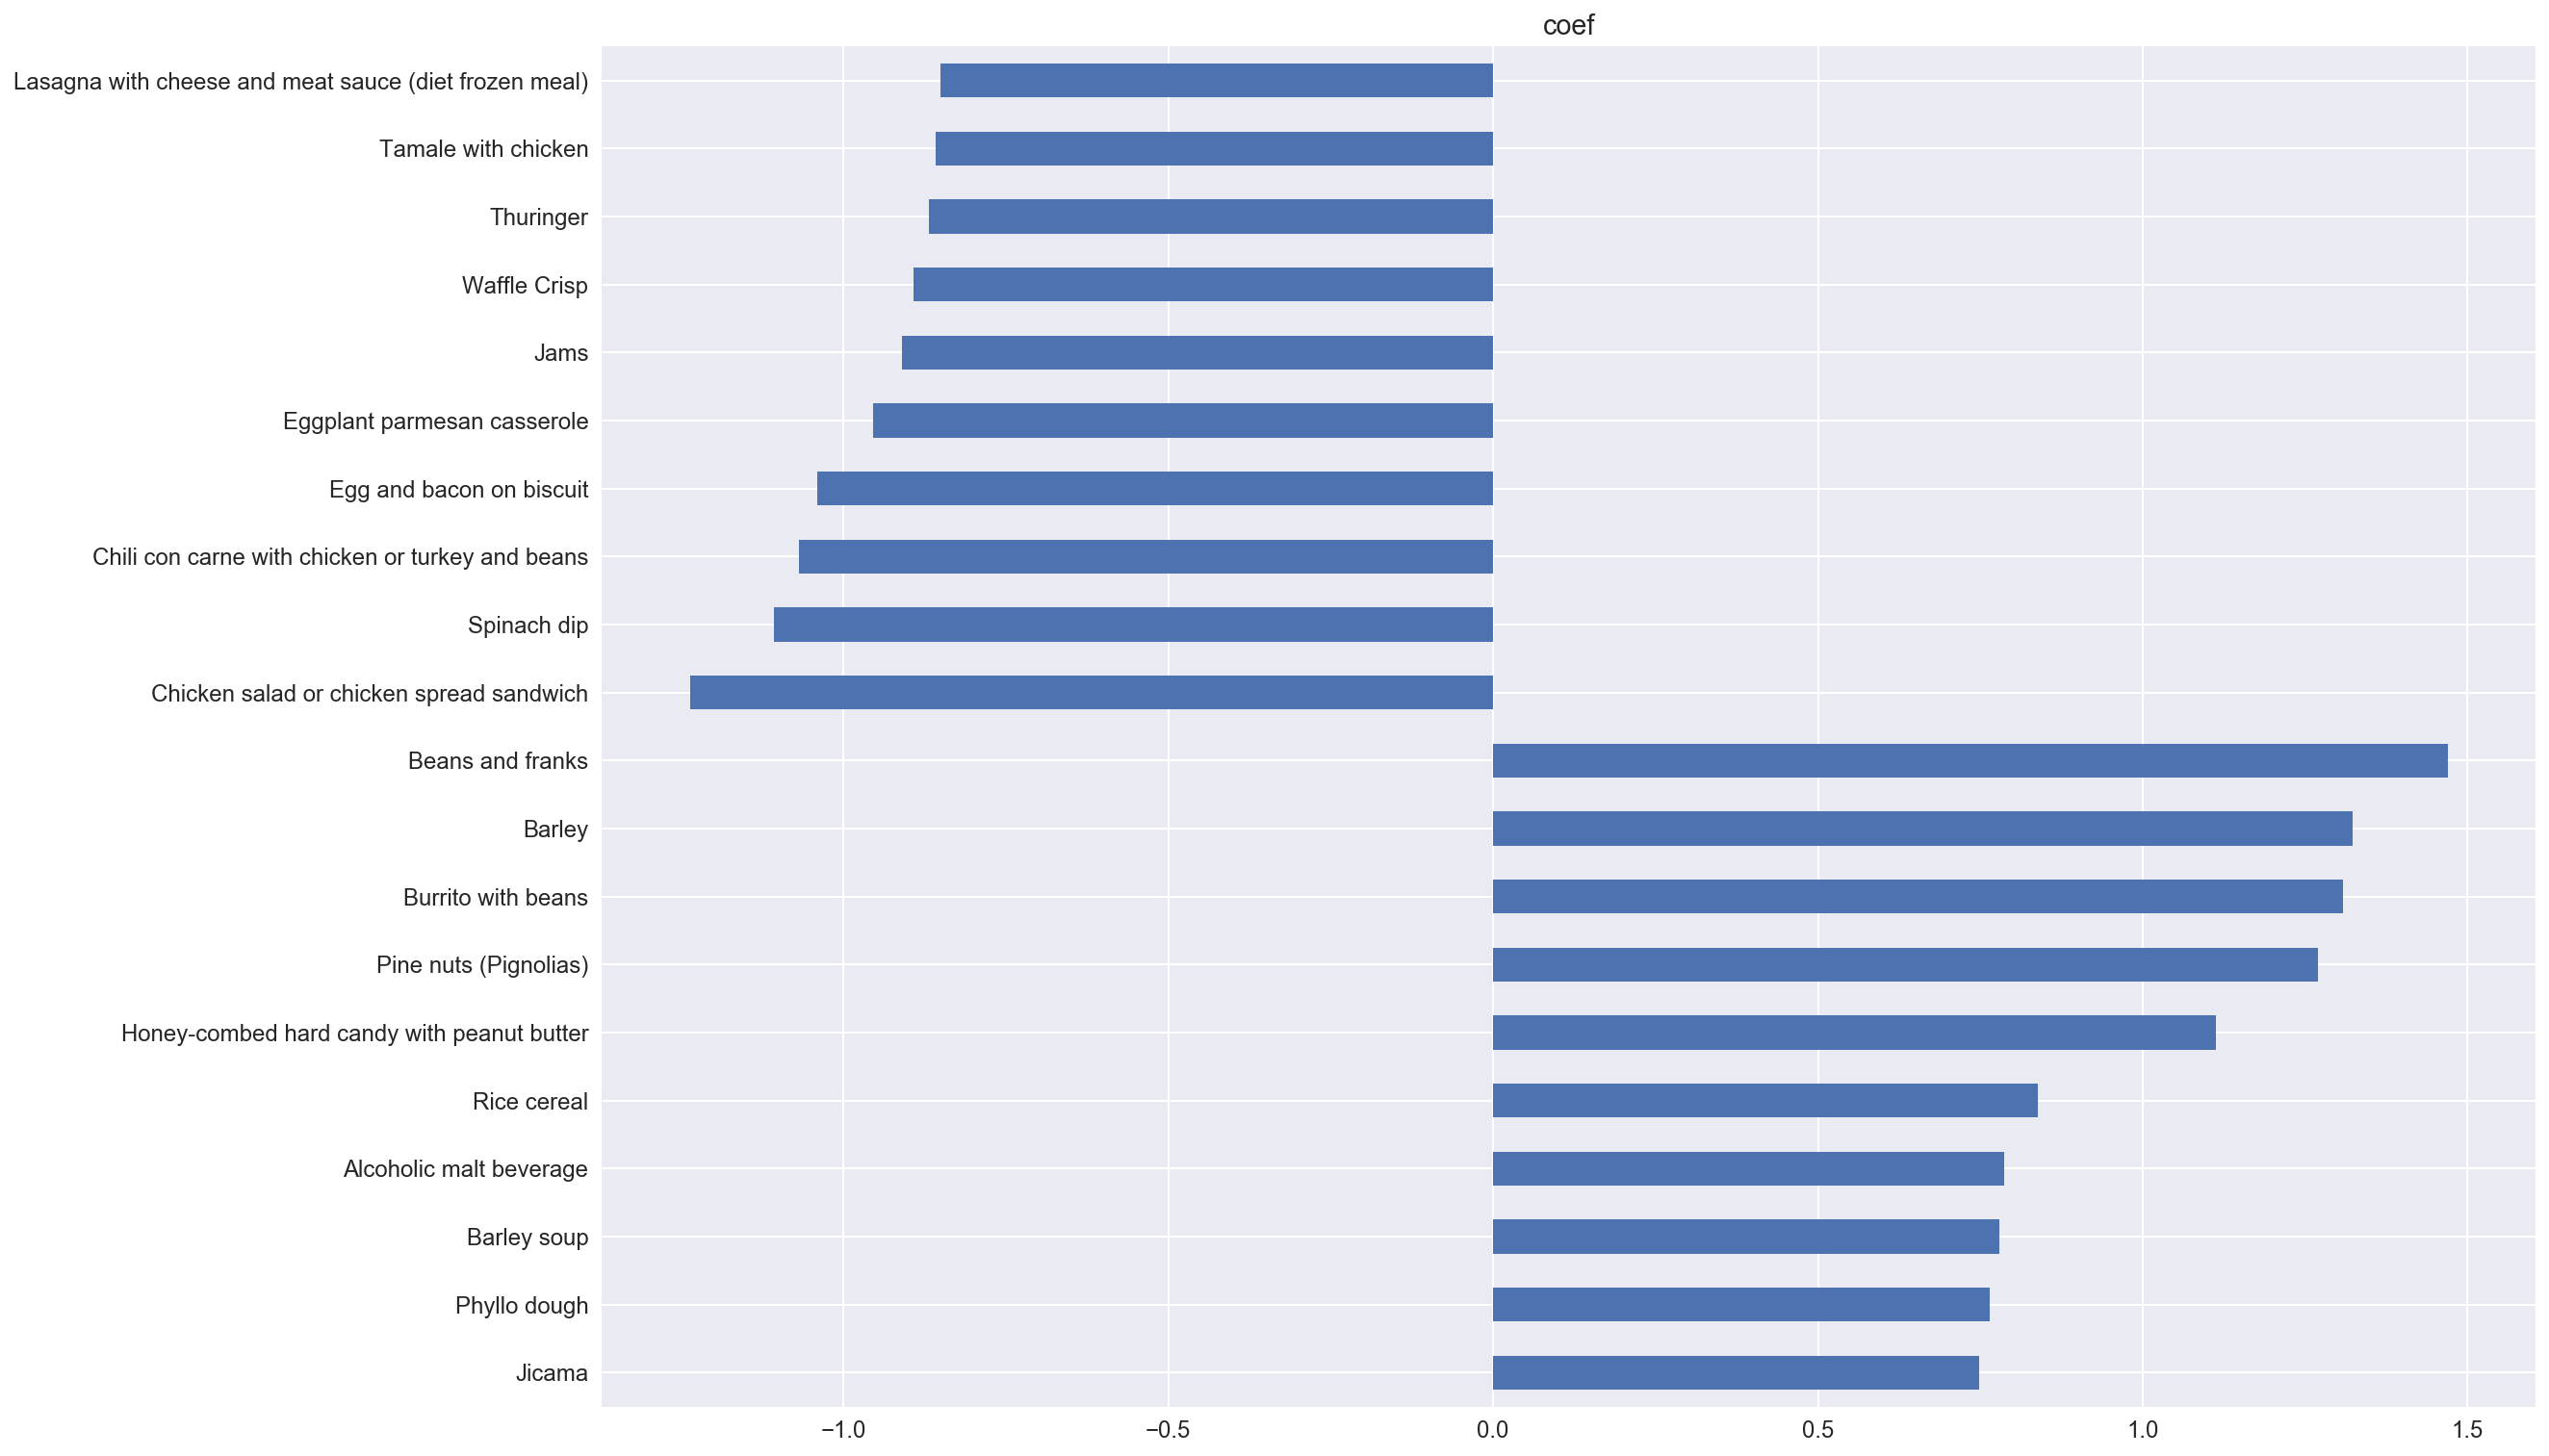

In [28]:
plot_lr_coef(lr,X_train)

In [190]:
print('Logistic Regression')
scores=cv_scores(lr_pipe,X_train,y_train,X_test,y_test)

Logistic Regression
Accuracy score is 0.5459 +/- 0.0000
Predicted  False  True   All
Actual                      
False        517   366   883
True         294   271   565
All          811   637  1448
             precision    recall  f1-score   support

      False       0.64      0.59      0.61       883
       True       0.43      0.48      0.45       565

avg / total       0.55      0.54      0.55      1448



### Random Forest and Support vector machine classifier with default parameters.
Next is to try Random Forest and Support vector machine classifier. The features importance from random forest can be extracted for analysis.

In [30]:
rf = RandomForestClassifier(n_estimators=20000, random_state=seed, n_jobs=-1)
svc=SVC(random_state=seed)
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])

In [31]:
rf_pipe.fit(X_train,y_train)
svc_pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False))])

In [32]:
print('Random Forest score is {:.4f}'.format(rf_pipe.score(X_test,y_test)))
scores(rf_pipe,X_test,y_test)
print('SVM Classifier score is {:.4f}'.format(svc_pipe.score(X_test,y_test)))
scores(svc_pipe,X_test,y_test)

Random Forest score is 0.6008
Predicted  False  True   All
Actual                      
False        721   116   837
True         462   149   611
All         1183   265  1448
             precision    recall  f1-score   support

      False       0.61      0.86      0.71       837
       True       0.56      0.24      0.34       611

avg / total       0.59      0.60      0.56      1448

SVM Classifier score is 0.5780
Predicted  False  True   All
Actual                      
False        730   107   837
True         504   107   611
All         1234   214  1448
             precision    recall  f1-score   support

      False       0.59      0.87      0.70       837
       True       0.50      0.18      0.26       611

avg / total       0.55      0.58      0.52      1448



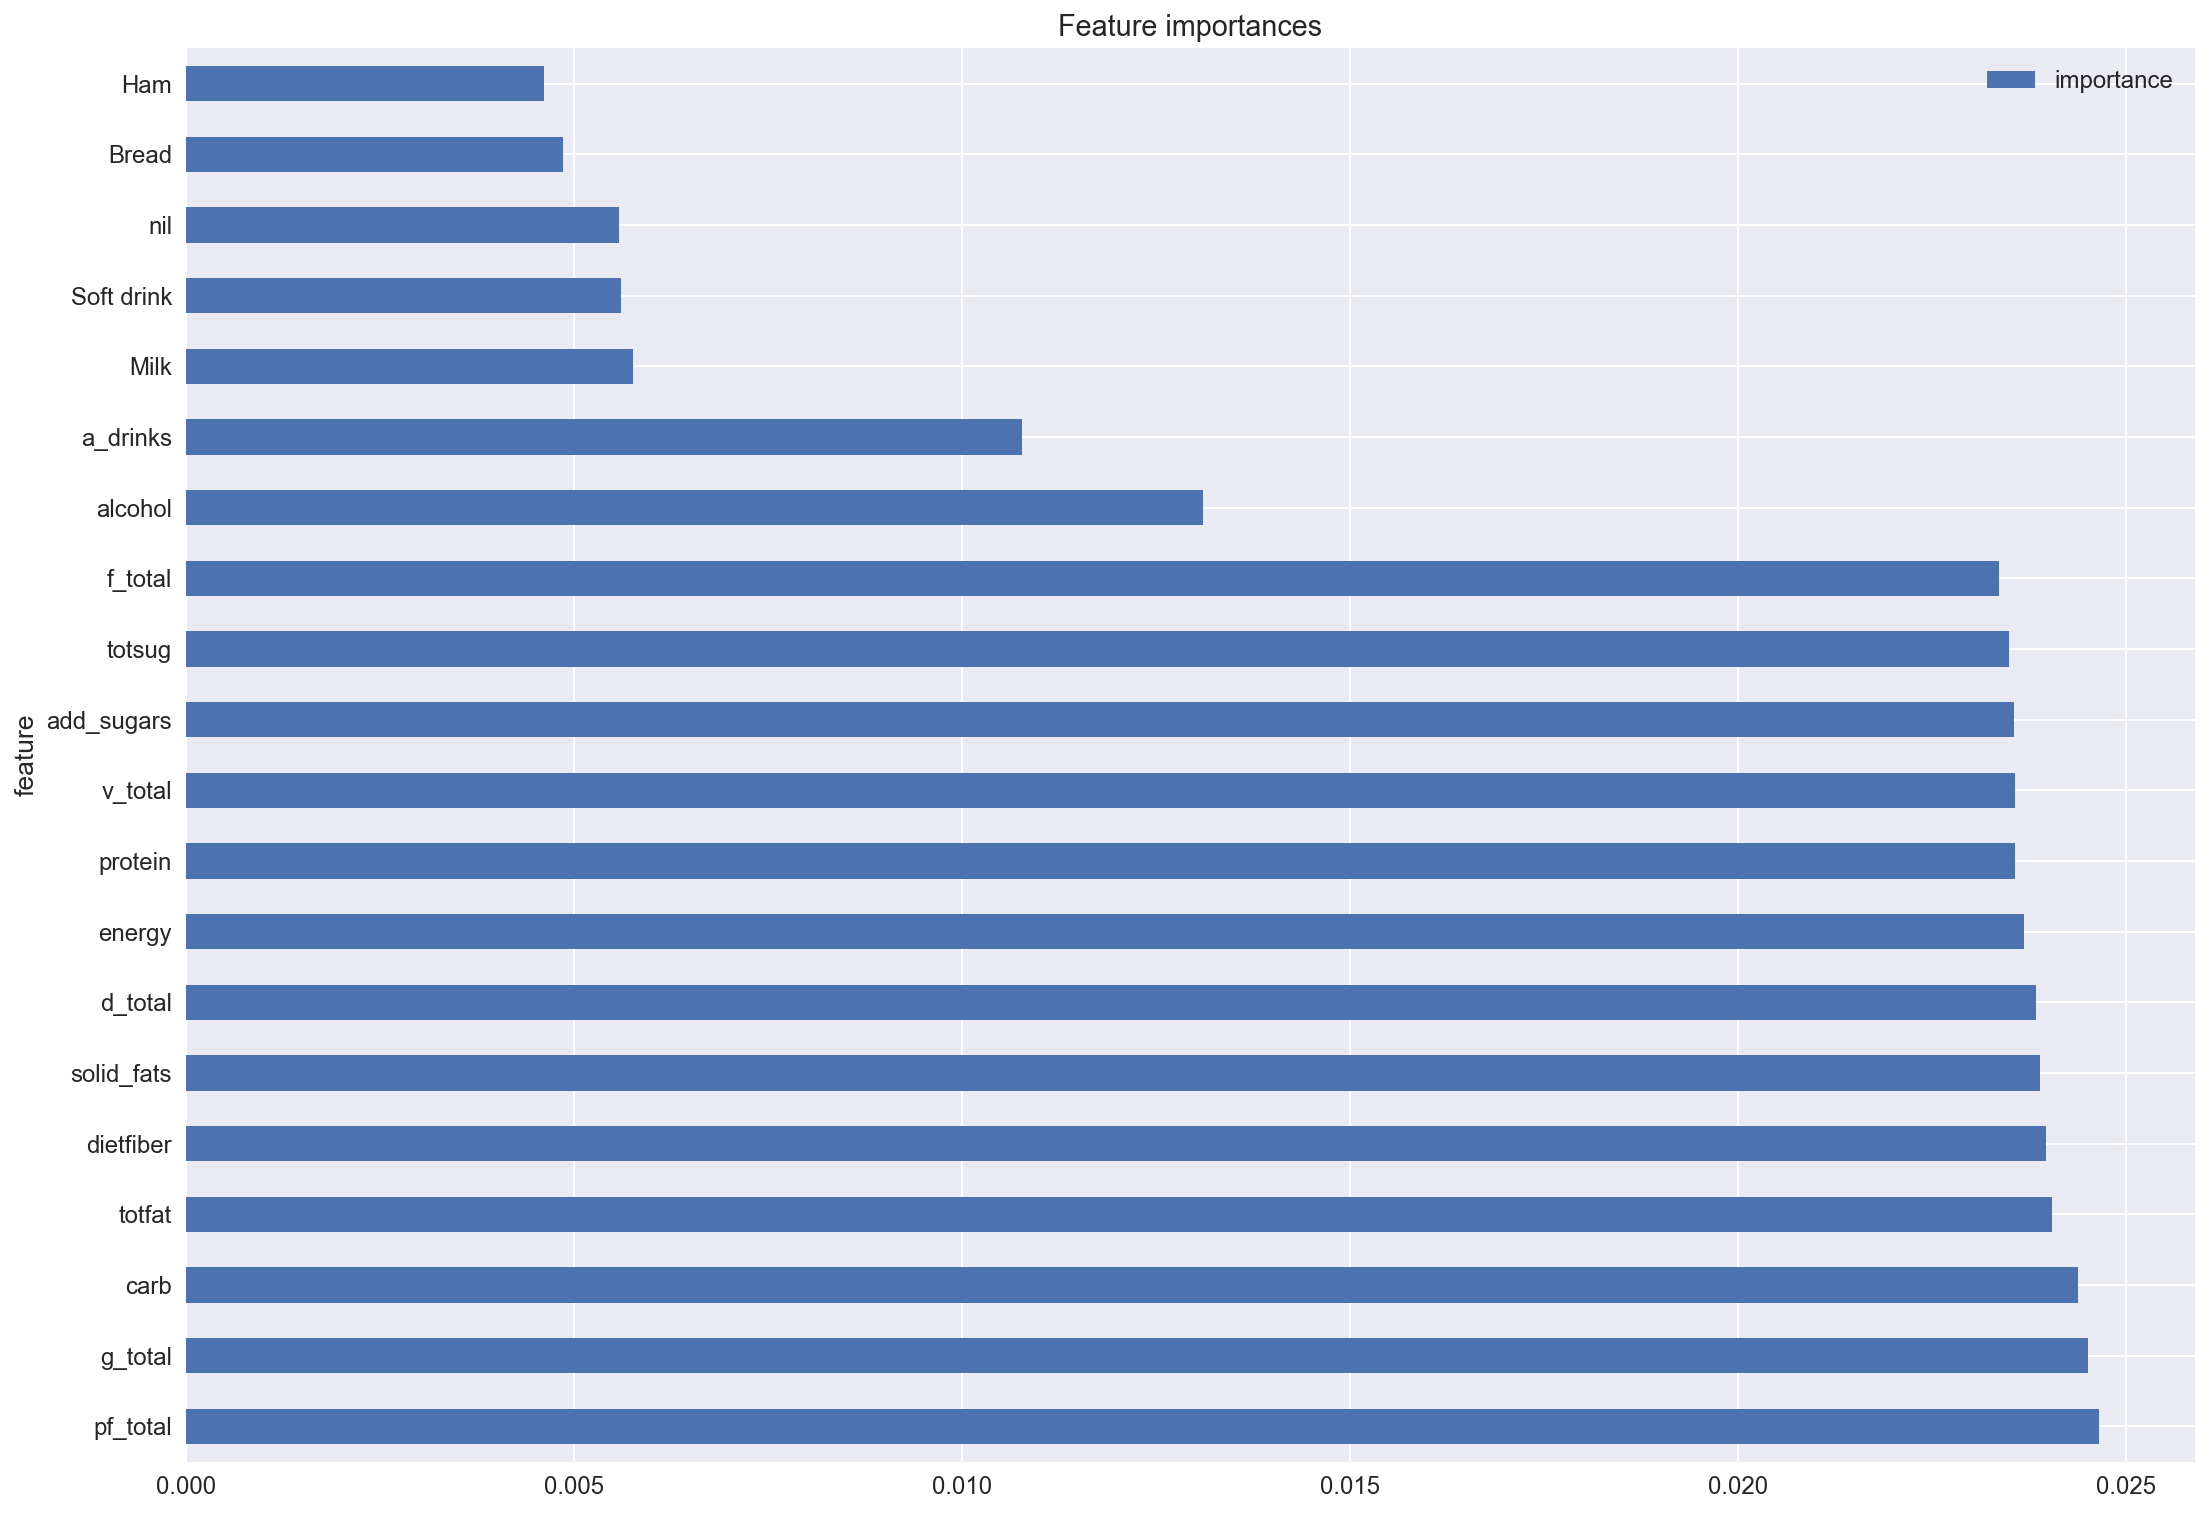

In [33]:
plot_rf_fi(rf,X_train);

## Feature selection based on Random forest features importances

- from the feature importances retrived, I will remove features that scores below 0.0001
- Will fit to Logistic Regression Model and observed results.

In [34]:
fi_clif = pd.DataFrame({'feature':X_train.columns,'importance':rf.feature_importances_})
fi_clif.sort_values('importance', ascending=False, inplace=True)

In [35]:
zero_rf=fi_clif[fi_clif.values<=0.0001]

In [36]:
X_rf=X.drop(zero_rf.feature,axis=1)

In [37]:
Xrf_train, Xrf_test, y_train, y_test = train_test_split(X_rf, y, train_size=0.7)

In [39]:
print('Logistic Regression')
lr = LogisticRegression(C=0.01261857,random_state=seed)
lr.fit(Xrf_train,y_train)
scores=cv_scores(lr,Xrf_train,y_train,Xrf_test,y_test)

Logistic Regression
Accuracy score is 0.6030 +/- 0.0000
Predicted  False  True   All
Actual                      
False        741   105   846
True         446   156   602
All         1187   261  1448
             precision    recall  f1-score   support

      False       0.62      0.88      0.73       846
       True       0.60      0.26      0.36       602

avg / total       0.61      0.62      0.58      1448



| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|Logistic Regression(Default Features )| 0.61 | 0.45|0.55|
| Logistic Regression (RF Features importances)| 0.73|0.36|0.58 |

- From the table above, we can see that there is a big increase in F1 score (False)  but at the expense of F1 score(True). Overall F1 score has increased.
- Next we will fit these features to both Random Forest and SVM classifier.


In [40]:
X_rf.shape

(4826, 880)

In [41]:
rf_pipe.fit(Xrf_train,y_train)
svc_pipe.fit(Xrf_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False))])

In [44]:
print('Random Forest score is {:.4f}'.format(rf_pipe.score(Xrf_test,y_test)))
scores(rf_pipe,Xrf_test,y_test)
print('SVM Classifier score is {:.4f}'.format(svc_pipe.score(Xrf_test,y_test)))
scores(svc_pipe,Xrf_test,y_test)

Random Forest score is 0.6091
Predicted  False  True   All
Actual                      
False        735   111   846
True         455   147   602
All         1190   258  1448
             precision    recall  f1-score   support

      False       0.62      0.87      0.72       846
       True       0.57      0.24      0.34       602

avg / total       0.60      0.61      0.56      1448

SVM Classifier score is 0.6126
Predicted  False  True   All
Actual                      
False        689   157   846
True         404   198   602
All         1093   355  1448
             precision    recall  f1-score   support

      False       0.63      0.81      0.71       846
       True       0.56      0.33      0.41       602

avg / total       0.60      0.61      0.59      1448



| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|Random Forest(Default Features )| 0.71 | 0.34|0.56|
| Random Forest (RF Features importances)| 0.72|0.34|0.56 |

- There is no drop in scores even though the number of features is reduced

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC (Default Features )| 0.70 | 0.26|0.52|
| SVC (RF Features importances)| 0.71|0.41|0.59 |

- Overall a significant improvement after features selection

### Best models so far 

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC (RF Features importances)| 0.71 | 0.41|0.59|
| Logistic Regression (RF Features importances)| 0.73|0.36|0.58 |
| Random Forest (RF Features importances)| 0.72|0.34|0.56 |




## SVM Classifier and Logistic Regression Parameter Tuning

- Gridsearch parameter C and gamma for SVC

In [55]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'svc__C': Cs, 'svc__gamma' : gammas}
    grid_search = GridSearchCV(svc_pipe, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [56]:
svc_param_selection(Xrf_train, y_train, 5)

{'svc__C': 1, 'svc__gamma': 0.001}

In [62]:
svc=SVC(random_state=seed,gamma=0.001)
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])
print('SVM Classifier score is {:.4f}'.format(svc_pipe.score(Xrf_test,y_test)))
scores(svc_pipe,Xrf_test,y_test)

SVM Classifier score is 0.6126
Predicted  False  True   All
Actual                      
False        689   157   846
True         404   198   602
All         1093   355  1448
             precision    recall  f1-score   support

      False       0.63      0.81      0.71       846
       True       0.56      0.33      0.41       602

avg / total       0.60      0.61      0.59      1448



In [45]:
lrcv = LogisticRegressionCV(penalty='l2', Cs=100, cv=10, solver='liblinear',random_state=seed)

In [46]:
lrcv.fit(Xrf_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [47]:
lrcv.C_

array([ 0.01047616])

In [48]:
lrcv.score(Xrf_test,y_test)

0.61256906077348061

In [104]:
print('Logistic Regression')
lr = LogisticRegression(C=0.01047616,random_state=seed)
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])
lr.fit(Xrf_train,y_train)
scores=cv_scores(lr,Xrf_train,y_train,Xrf_test,y_test)

Logistic Regression
Accuracy score is 0.6021 +/- 0.0000
Predicted  False  True   All
Actual                      
False        742   104   846
True         457   145   602
All         1199   249  1448
             precision    recall  f1-score   support

      False       0.62      0.88      0.73       846
       True       0.58      0.24      0.34       602

avg / total       0.60      0.61      0.57      1448



- Overall there isn't any improvement in the F1 scores.
- Only improvements observed in accuracy scores for both Logistic Regression and SVC.

## With class weight = balanced

- So far all three best models achieve high scores in F1 (False) but have rather low scores in F1 (True)
- Will set class weight = balanced and observed if the F1 (True score) will imporoved.

In [72]:
print('Logistic Regression-balanced classweight')
lr = LogisticRegression(C=0.01047616,class_weight='balanced',random_state=seed)
lr.fit(Xrf_train,y_train)
scores=cv_scores(lr,Xrf_train,y_train,Xrf_test,y_test)

Logistic Regression-balanced classweight
Accuracy score is 0.5722 +/- 0.0000
Predicted  False  True   All
Actual                      
False        552   294   846
True         298   304   602
All          850   598  1448
             precision    recall  f1-score   support

      False       0.65      0.65      0.65       846
       True       0.51      0.50      0.51       602

avg / total       0.59      0.59      0.59      1448



In [73]:
print('SVM-balanced classweight')
svc = SVC(class_weight='balanced',random_state=seed)
svc.fit(Xrf_train,y_train)
scores=cv_scores(svc,Xrf_train,y_train,Xrf_test,y_test)

SVM-balanced classweight
Accuracy score is 0.5216 +/- 0.0000
Predicted  False  True   All
Actual                      
False        473   373   846
True         281   321   602
All          754   694  1448
             precision    recall  f1-score   support

      False       0.63      0.56      0.59       846
       True       0.46      0.53      0.50       602

avg / total       0.56      0.55      0.55      1448



| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC(RF Features importances)| 0.59 | 0.50|0.55|
| Logistic Regression (L1)(RF Features importances)| 0.65|0.51|0.59 |

- Huge improvement on the F1 Score(True) but at the expense of F1 Score (False)
 

## XG Boost

- XGBoost (eXtreme Gradient Boosting) is an advanced implementation of gradient boosting algorithm.
- The algorithm uses multiple parameters. 
- To improve the model, parameter tuning is must.
- I will fit the model with  features based on Random Forest Features selection.

In [74]:
xgb = xgboost.XGBClassifier(random_state=seed)

In [75]:
xgb.fit(Xrf_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [76]:
scores=cv_scores(xgb,Xrf_train,y_train,Xrf_test,y_test)

Accuracy score is 0.5980 +/- 0.0000
Predicted  False  True   All
Actual                      
False        741   105   846
True         457   145   602
All         1198   250  1448
             precision    recall  f1-score   support

      False       0.62      0.88      0.73       846
       True       0.58      0.24      0.34       602

avg / total       0.60      0.61      0.57      1448



### Next I will tune the following parameters  with GridSearch:

- min_child_weight [default=1], used to control over-fitting. Too high values can lead to under-fitting hence, it should be tuned using CV.

- max_depth [default=6], used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- gamma [default=0], gamma specifies the minimum loss reduction required to make a split.Makes the algorithm conservative.
- subsample [default=1], lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

- colsample_bytree [default=1,] denotes the fraction of columns to be randomly samples for each tree.


In [89]:
param_test = {
 'max_depth':[4,6,8,10],
 'min_child_weight':[4,6,8,10],
 
}
gs = GridSearchCV(xgb,param_test,cv=5, n_jobs=-1)
gs.fit(Xrf_train,y_train)
gs.best_params_

{'max_depth': 4, 'min_child_weight': 6}

In [90]:
scores=cv_scores(gs.best_estimator_,Xrf_train,y_train,Xrf_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5912 +/- 0.0000
Predicted  False  True   All
Actual                      
False        725   121   846
True         446   156   602
All         1171   277  1448
             precision    recall  f1-score   support

      False       0.62      0.86      0.72       846
       True       0.56      0.26      0.35       602

avg / total       0.60      0.61      0.57      1448

Accuracy score for logistic regression is 0.5912 +/- 0.0000


In [91]:
xgb=xgboost.XGBClassifier(n_estimators=100,random_state=seed,max_depth=4,min_child_weight=6,n_jobs=-1)

In [95]:
xgb.fit(Xrf_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [83]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gs = GridSearchCV(xgb,param_test,cv=5, n_jobs=-1)
gs.fit(Xrf_train,y_train)
gs.best_params_

{'gamma': 0.4}

In [84]:
scores=cv_scores(gs.best_estimator_,Xrf_train,y_train,Xrf_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5903 +/- 0.0000
Predicted  False  True   All
Actual                      
False        730   116   846
True         447   155   602
All         1177   271  1448
             precision    recall  f1-score   support

      False       0.62      0.86      0.72       846
       True       0.57      0.26      0.36       602

avg / total       0.60      0.61      0.57      1448

Accuracy score for logistic regression is 0.5903 +/- 0.0000


In [96]:
xgb=xgboost.XGBClassifier(n_estimators=100,random_state=seed,gamma=0.4,max_depth=4,min_child_weight=6,n_jobs=-1)

In [97]:
xgb.fit(Xrf_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [87]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gs = GridSearchCV(xgb,param_test,cv=3, n_jobs=-1)
gs.fit(Xrf_train,y_train)
gs.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.7}

In [88]:
scores=cv_scores(gs.best_estimator_,Xrf_train,y_train,Xrf_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5891 +/- 0.0000
Predicted  False  True   All
Actual                      
False        720   126   846
True         436   166   602
All         1156   292  1448
             precision    recall  f1-score   support

      False       0.62      0.85      0.72       846
       True       0.57      0.28      0.37       602

avg / total       0.60      0.61      0.57      1448

Accuracy score for logistic regression is 0.5891 +/- 0.0000


In [128]:
xgb=xgboost.XGBClassifier(n_estimators=200,random_state=seed,colsample_bytree=0.7,subsample= 0.7,gamma=0.4,max_depth=4,min_child_weight=6,n_jobs=-1)

In [129]:
xgb.fit(Xrf_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=6, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=17, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

In [130]:
scores=cv_scores(xgb,Xrf_train,y_train,Xrf_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5802 +/- 0.0000
Predicted  False  True   All
Actual                      
False        647   199   846
True         406   196   602
All         1053   395  1448
             precision    recall  f1-score   support

      False       0.61      0.76      0.68       846
       True       0.50      0.33      0.39       602

avg / total       0.57      0.58      0.56      1448

Accuracy score for logistic regression is 0.5802 +/- 0.0000


| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|XGB(Default Parameters)| 0.73 | 0.34|0.57|
|XGB(Tuned)| 0.68|0.39|0.56 |

- Slight imporvement in F1 Score (True)
- XGB has its own set of feature importances.
- Will drop features = 0 based XGB feature importances.
- Will retuned same parameters based on new features


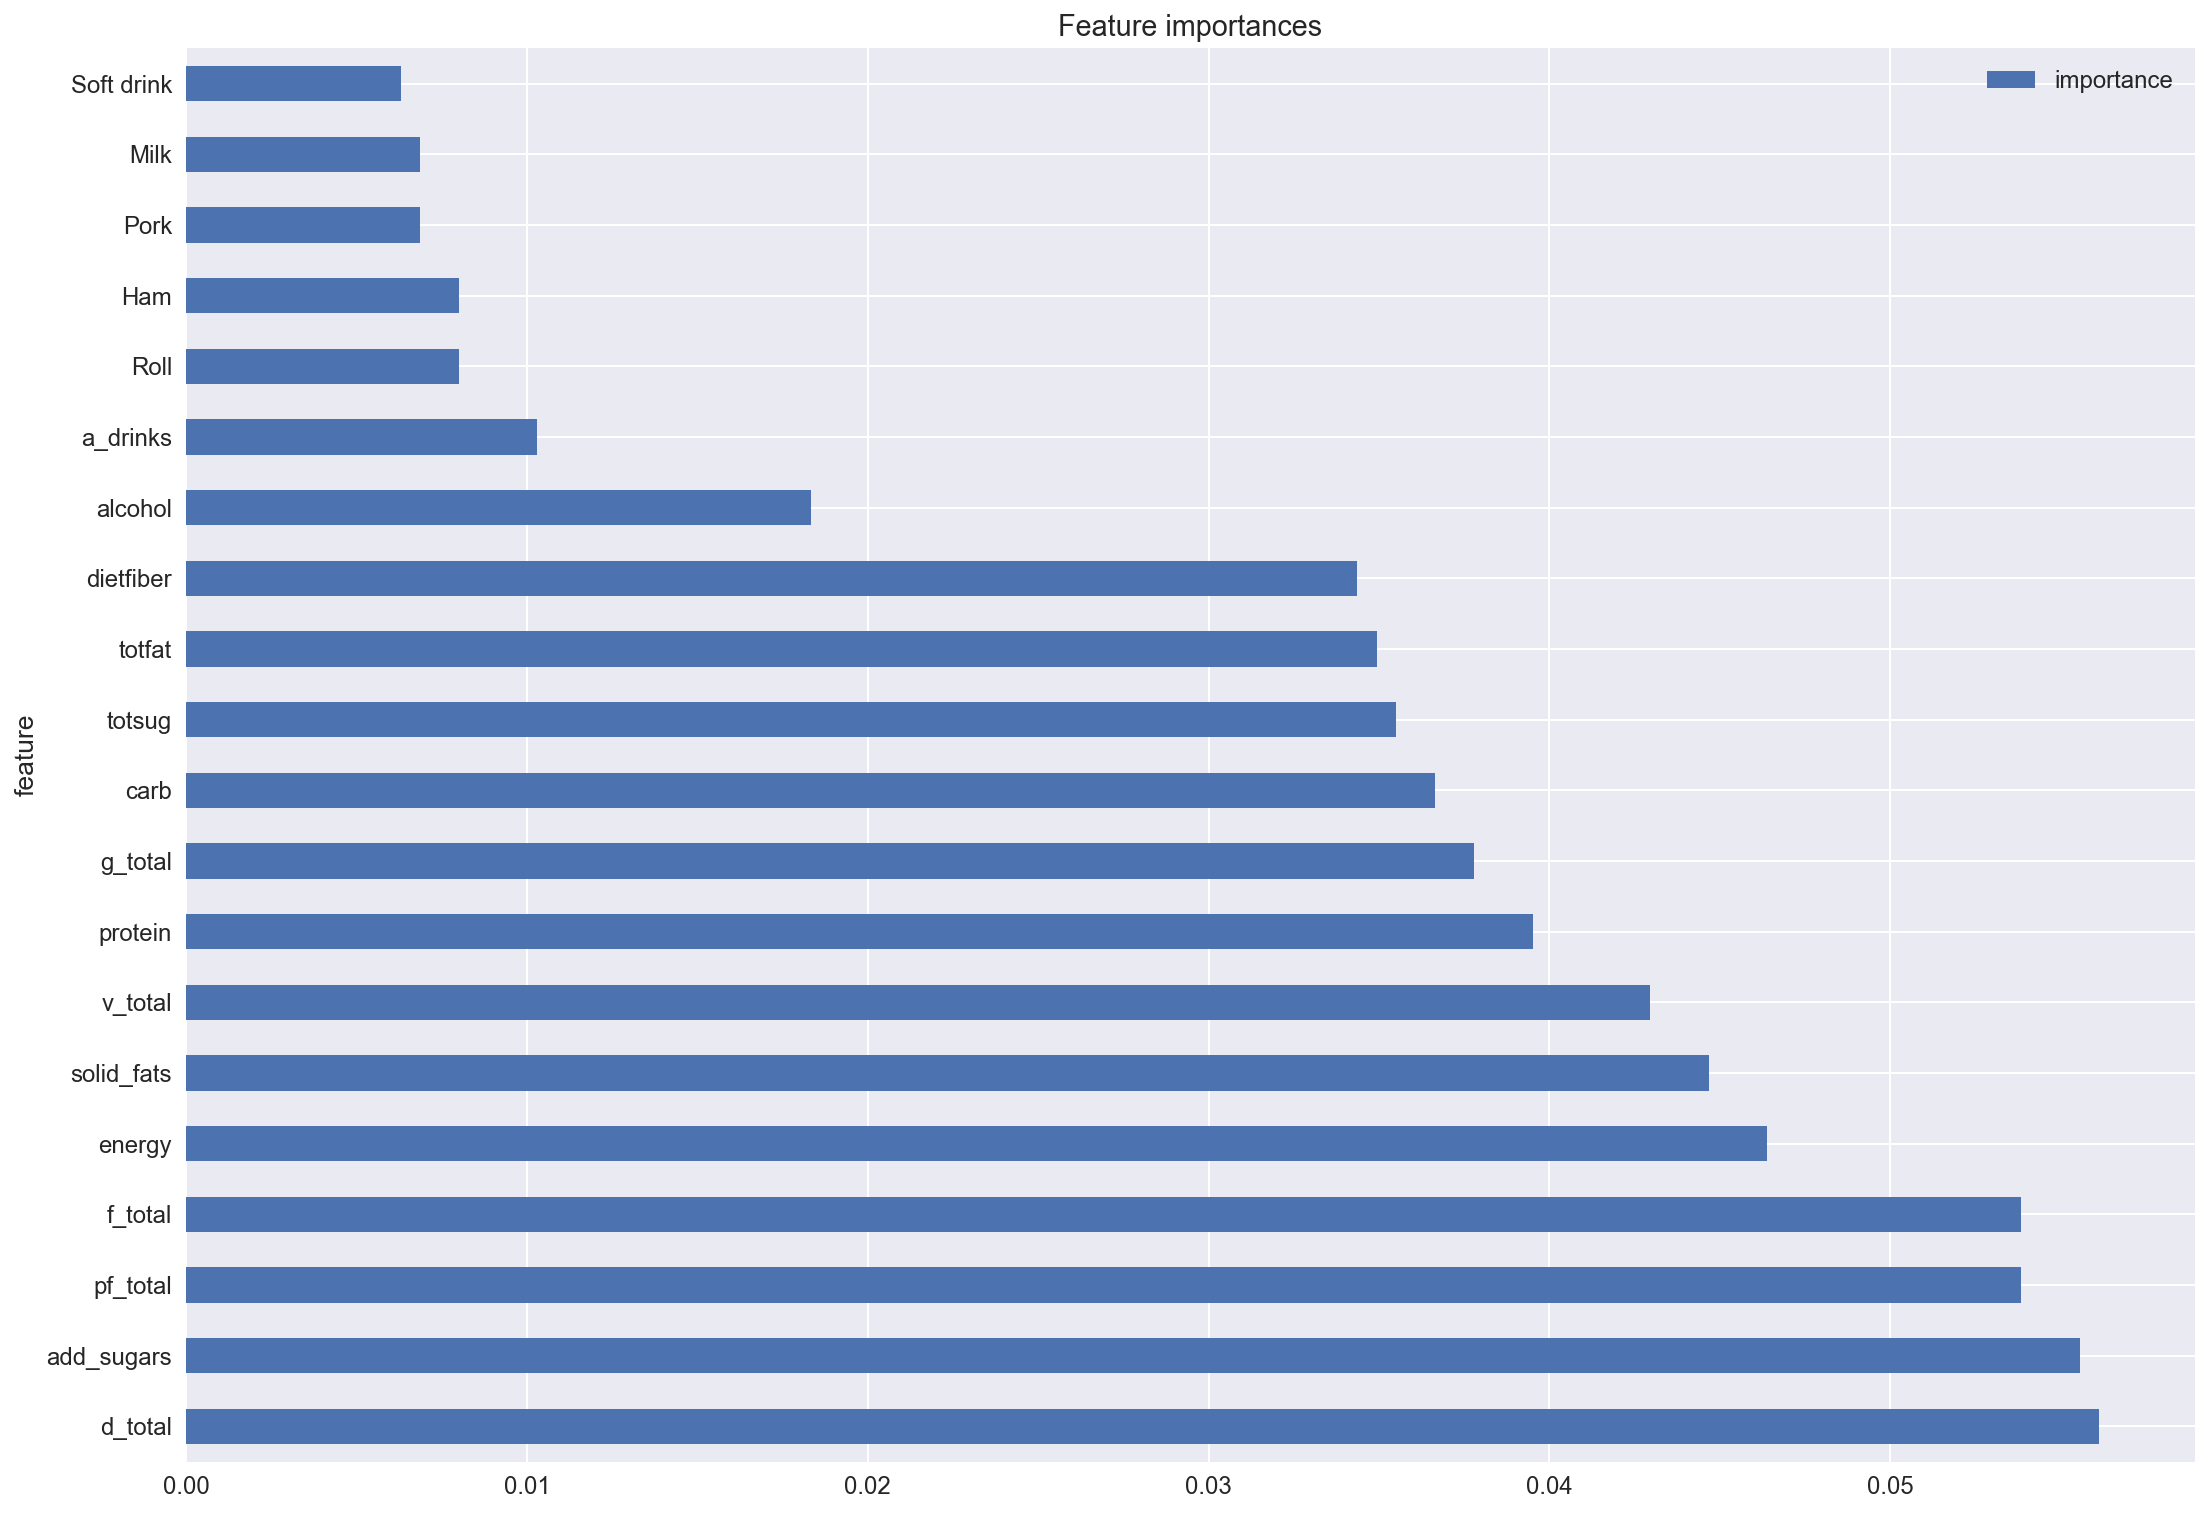

In [132]:
xgb.feature_importances_

fi_clif2 = pd.DataFrame({'feature':Xrf_train.columns,'importance':xgb.feature_importances_})
fi_clif2.sort_values('importance', ascending=False, inplace=True)
fi_clif2.head(20)
plot=fi_clif2.head(20).plot(kind='barh', y='importance',x='feature', figsize=(18,13), title='Feature importances', 
         sort_columns=False)

In [135]:
fi_clif2
zero_xgb=fi_clif2[fi_clif2.values<=0.0]
X_xgb=X_rf.drop(zero_xgb.feature,axis=1)

In [136]:
X_xgb.shape

(4826, 223)

In [137]:
Xgb_train, Xgb_test, y_train, y_test = train_test_split(X_xgb, y, train_size=0.7)

In [139]:
xgb.fit(Xgb_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=6, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=17, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

In [140]:
scores=cv_scores(xgb,Xgb_train,y_train,Xgb_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5844 +/- 0.0000
Predicted  False  True   All
Actual                      
False        650   194   844
True         391   213   604
All         1041   407  1448
             precision    recall  f1-score   support

      False       0.62      0.77      0.69       844
       True       0.52      0.35      0.42       604

avg / total       0.58      0.60      0.58      1448

Accuracy score for logistic regression is 0.5844 +/- 0.0000


In [141]:
param_test = {
 'max_depth':[4,6,8,10],
 'min_child_weight':[4,6,8,10],
 
}
gs = GridSearchCV(xgb,param_test,cv=5, n_jobs=-1)
gs.fit(Xgb_train,y_train)
gs.best_params_

{'max_depth': 4, 'min_child_weight': 10}

In [142]:
scores=cv_scores(gs.best_estimator_,Xgb_train,y_train,Xgb_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5888 +/- 0.0000
Predicted  False  True   All
Actual                      
False        651   193   844
True         375   229   604
All         1026   422  1448
             precision    recall  f1-score   support

      False       0.63      0.77      0.70       844
       True       0.54      0.38      0.45       604

avg / total       0.60      0.61      0.59      1448

Accuracy score for logistic regression is 0.5888 +/- 0.0000


In [143]:
xgb=xgboost.XGBClassifier(n_estimators=200,random_state=seed,max_depth=4,min_child_weight=10,n_jobs=-1)

In [144]:
xgb.fit(Xgb_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=10, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [145]:
param_test = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gs = GridSearchCV(xgb,param_test,cv=5, n_jobs=-1)
gs.fit(Xgb_train,y_train)
gs.best_params_

{'gamma': 0.3}

In [146]:
scores=cv_scores(gs.best_estimator_,Xgb_train,y_train,Xgb_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5879 +/- 0.0000
Predicted  False  True   All
Actual                      
False        652   192   844
True         394   210   604
All         1046   402  1448
             precision    recall  f1-score   support

      False       0.62      0.77      0.69       844
       True       0.52      0.35      0.42       604

avg / total       0.58      0.60      0.58      1448

Accuracy score for logistic regression is 0.5879 +/- 0.0000


In [147]:
xgb=xgboost.XGBClassifier(n_estimators=200,random_state=seed,gamma=0.3,max_depth=4,min_child_weight=10,n_jobs=-1)

In [148]:
xgb.fit(Xgb_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=10, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [149]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gs = GridSearchCV(xgb,param_test,cv=5, n_jobs=-1)
gs.fit(Xgb_train,y_train)
gs.best_params_

{'colsample_bytree': 0.6, 'subsample': 0.8}

In [150]:
scores=cv_scores(gs.best_estimator_,Xgb_train,y_train,Xgb_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5891 +/- 0.0000
Predicted  False  True   All
Actual                      
False        662   182   844
True         396   208   604
All         1058   390  1448
             precision    recall  f1-score   support

      False       0.63      0.78      0.70       844
       True       0.53      0.34      0.42       604

avg / total       0.59      0.60      0.58      1448

Accuracy score for logistic regression is 0.5891 +/- 0.0000


In [151]:
xgb=xgboost.XGBClassifier(n_estimators=200,random_state=seed,colsample_bytree=0.6,subsample= 0.8,gamma=0.3,max_depth=4,min_child_weight=6,n_jobs=-1)

In [152]:
xgb.fit(Xgb_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=6, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=17, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [153]:
scores=cv_scores(xgb,Xgb_train,y_train,Xgb_test,y_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5882 +/- 0.0000
Predicted  False  True   All
Actual                      
False        663   181   844
True         399   205   604
All         1062   386  1448
             precision    recall  f1-score   support

      False       0.62      0.79      0.70       844
       True       0.53      0.34      0.41       604

avg / total       0.59      0.60      0.58      1448

Accuracy score for logistic regression is 0.5882 +/- 0.0000


| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|XGB(RF Features,Tuned)| 0.68 | 0.39|0.56|
|XGB(XGB Features, Tuned)| 0.70|0.41|0.58 |

- Overall imporvement in F1 Scores



### Xgboost conclusion:
- around the same F1 scores as SVM after tuning
- able to achive same scores with much less features( 223 vs 880 plus features)

## Summary

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC(RF Features importances)| 0.71 | 0.41|0.59|
| Logistic Regression (L2)(RF Features importances)| 0.73 |0.34|0.57 |
|Random Forest(RF Features importances)|0.72|0.34|0.57|
|Xgboost(Xgb Features importances)|0.70|0.41|0.58|


### Class_weight=balanced

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC(RF Features importances)| 0.59 | 0.50|0.55|
| Logistic Regression (L1)(RF Features importances)| 0.65|0.51|0.59 |

- Overall both SVC and XGB have around the same F1 scores.
- F1 Scores (True) are on the low side -0.41.
- Making class weight balanced results in huge trade off.




## Voting classifier ensemble

- Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.
- If voting set to ‘hard’, uses predicted class labels for majority rule voting. 
- Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities.

### Based on the final models, I decided to use the following models and attempt to increase th F1 scores (True) while reducing the trade off:

- Logistic Regression and SVC set to class weight balanced.
- Random Forest.

In [119]:
lr = LogisticRegression(C=0.01047616,class_weight='balanced',random_state=seed)
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])
svc = SVC(class_weight='balanced',gamma=0.001,random_state=seed,probability=True)
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])
rf = RandomForestClassifier(n_estimators=20000, random_state=seed, n_jobs=-1)
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])

In [123]:
estimators = []
model1 = lr_pipe
estimators.append(('lr', model1))
model2 = svc_pipe
estimators.append(('svm', model2))
model3 = rf_pipe
estimators.append(('rf', model3))


# create the ensemble model
ensemble = VotingClassifier(estimators,voting='hard')

In [124]:
print('Ensemble Voting Classifier(3 models- svm and lr balanced classweight, voting=hard)')
ensemble.fit(Xrf_train,y_train)
scores=cv_scores(ensemble,Xrf_train,y_train,Xrf_test,y_test)

Ensemble Voting Classifier(4 models-balanced classweight, voting=hard)
Accuracy score is 0.5903 +/- 0.0000
Predicted  False  True   All
Actual                      
False        627   219   846
True         343   259   602
All          970   478  1448
             precision    recall  f1-score   support

      False       0.65      0.74      0.69       846
       True       0.54      0.43      0.48       602

avg / total       0.60      0.61      0.60      1448



In [180]:
ensemble1 = VotingClassifier(estimators,voting='soft',weights=[1,1,1])

In [181]:
print('Ensemble Voting Classifier(4 models-balanced classweight, voting=soft)')
ensemble1.fit(Xrf_train,y_train)
scores=cv_scores(ensemble1,Xrf_train,y_train,Xrf_test,y_test)

Ensemble Voting Classifier(4 models-balanced classweight, voting=soft)
Accuracy score is 0.5444 +/- 0.0000
Predicted  False  True   All
Actual                      
False        631   213   844
True         465   139   604
All         1096   352  1448
             precision    recall  f1-score   support

      False       0.58      0.75      0.65       844
       True       0.39      0.23      0.29       604

avg / total       0.50      0.53      0.50      1448



In [184]:
ensemble2 = VotingClassifier(estimators,voting='soft',weights=[1,1,2])

In [185]:
print('Ensemble Voting Classifier(4 models-balanced classweight, voting=soft)')
ensemble2.fit(Xrf_train,y_train)
scores=cv_scores(ensemble2,Xrf_train,y_train,Xrf_test,y_test)

Ensemble Voting Classifier(4 models-balanced classweight, voting=soft)
Accuracy score is 0.5565 +/- 0.0000
Predicted  False  True   All
Actual                      
False        676   168   844
True         496   108   604
All         1172   276  1448
             precision    recall  f1-score   support

      False       0.58      0.80      0.67       844
       True       0.39      0.18      0.25       604

avg / total       0.50      0.54      0.49      1448



## Final Model selection  - Voting Classifier:

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC(RF Features importances)| 0.71 | 0.41|0.59|
| Logistic Regression (L1)(RF Features importances)| 0.73 |0.34|0.57 |
|Random Forest(RF Features importances)|0.72|0.34|0.57|
|Xgboost(Xgb Features importances)|0.70|0.41|0.58|
|Voting Classifier(RF,SVM,LR)|0.69|0.48|0.60|

- As observed above, the Voting Classifier ensemble managed to increase F1 Score (True) while minimizing the drop for F1 (False)
- Overall F1 Score also improved
- Thus this wiill be the final model selected


<img src="https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/08/03/13/lifestyle5.jpg" width="700">
 
 
 
 
## Modelling for Dietary habit prediction
We will predicting a binary variable- whether the food purchase will be above or below median healthy score,we will be using classifier model.
We create a new binary variable that is true when the score is below mean.

In [218]:
y1=y1<y1.mean()
baseline1=y1.value_counts()
baseline1=float(baseline1[0])/(baseline1[0]+baseline1[1])
baseline1

0.5582262743472856

### Logistic Regression- Default parameters
The calculated baseline is 0.55. I will  start off again using Logistic Regression.


In [219]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7)

In [204]:
lr = LogisticRegression(random_state=seed)
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])

In [41]:
lr_pipe.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

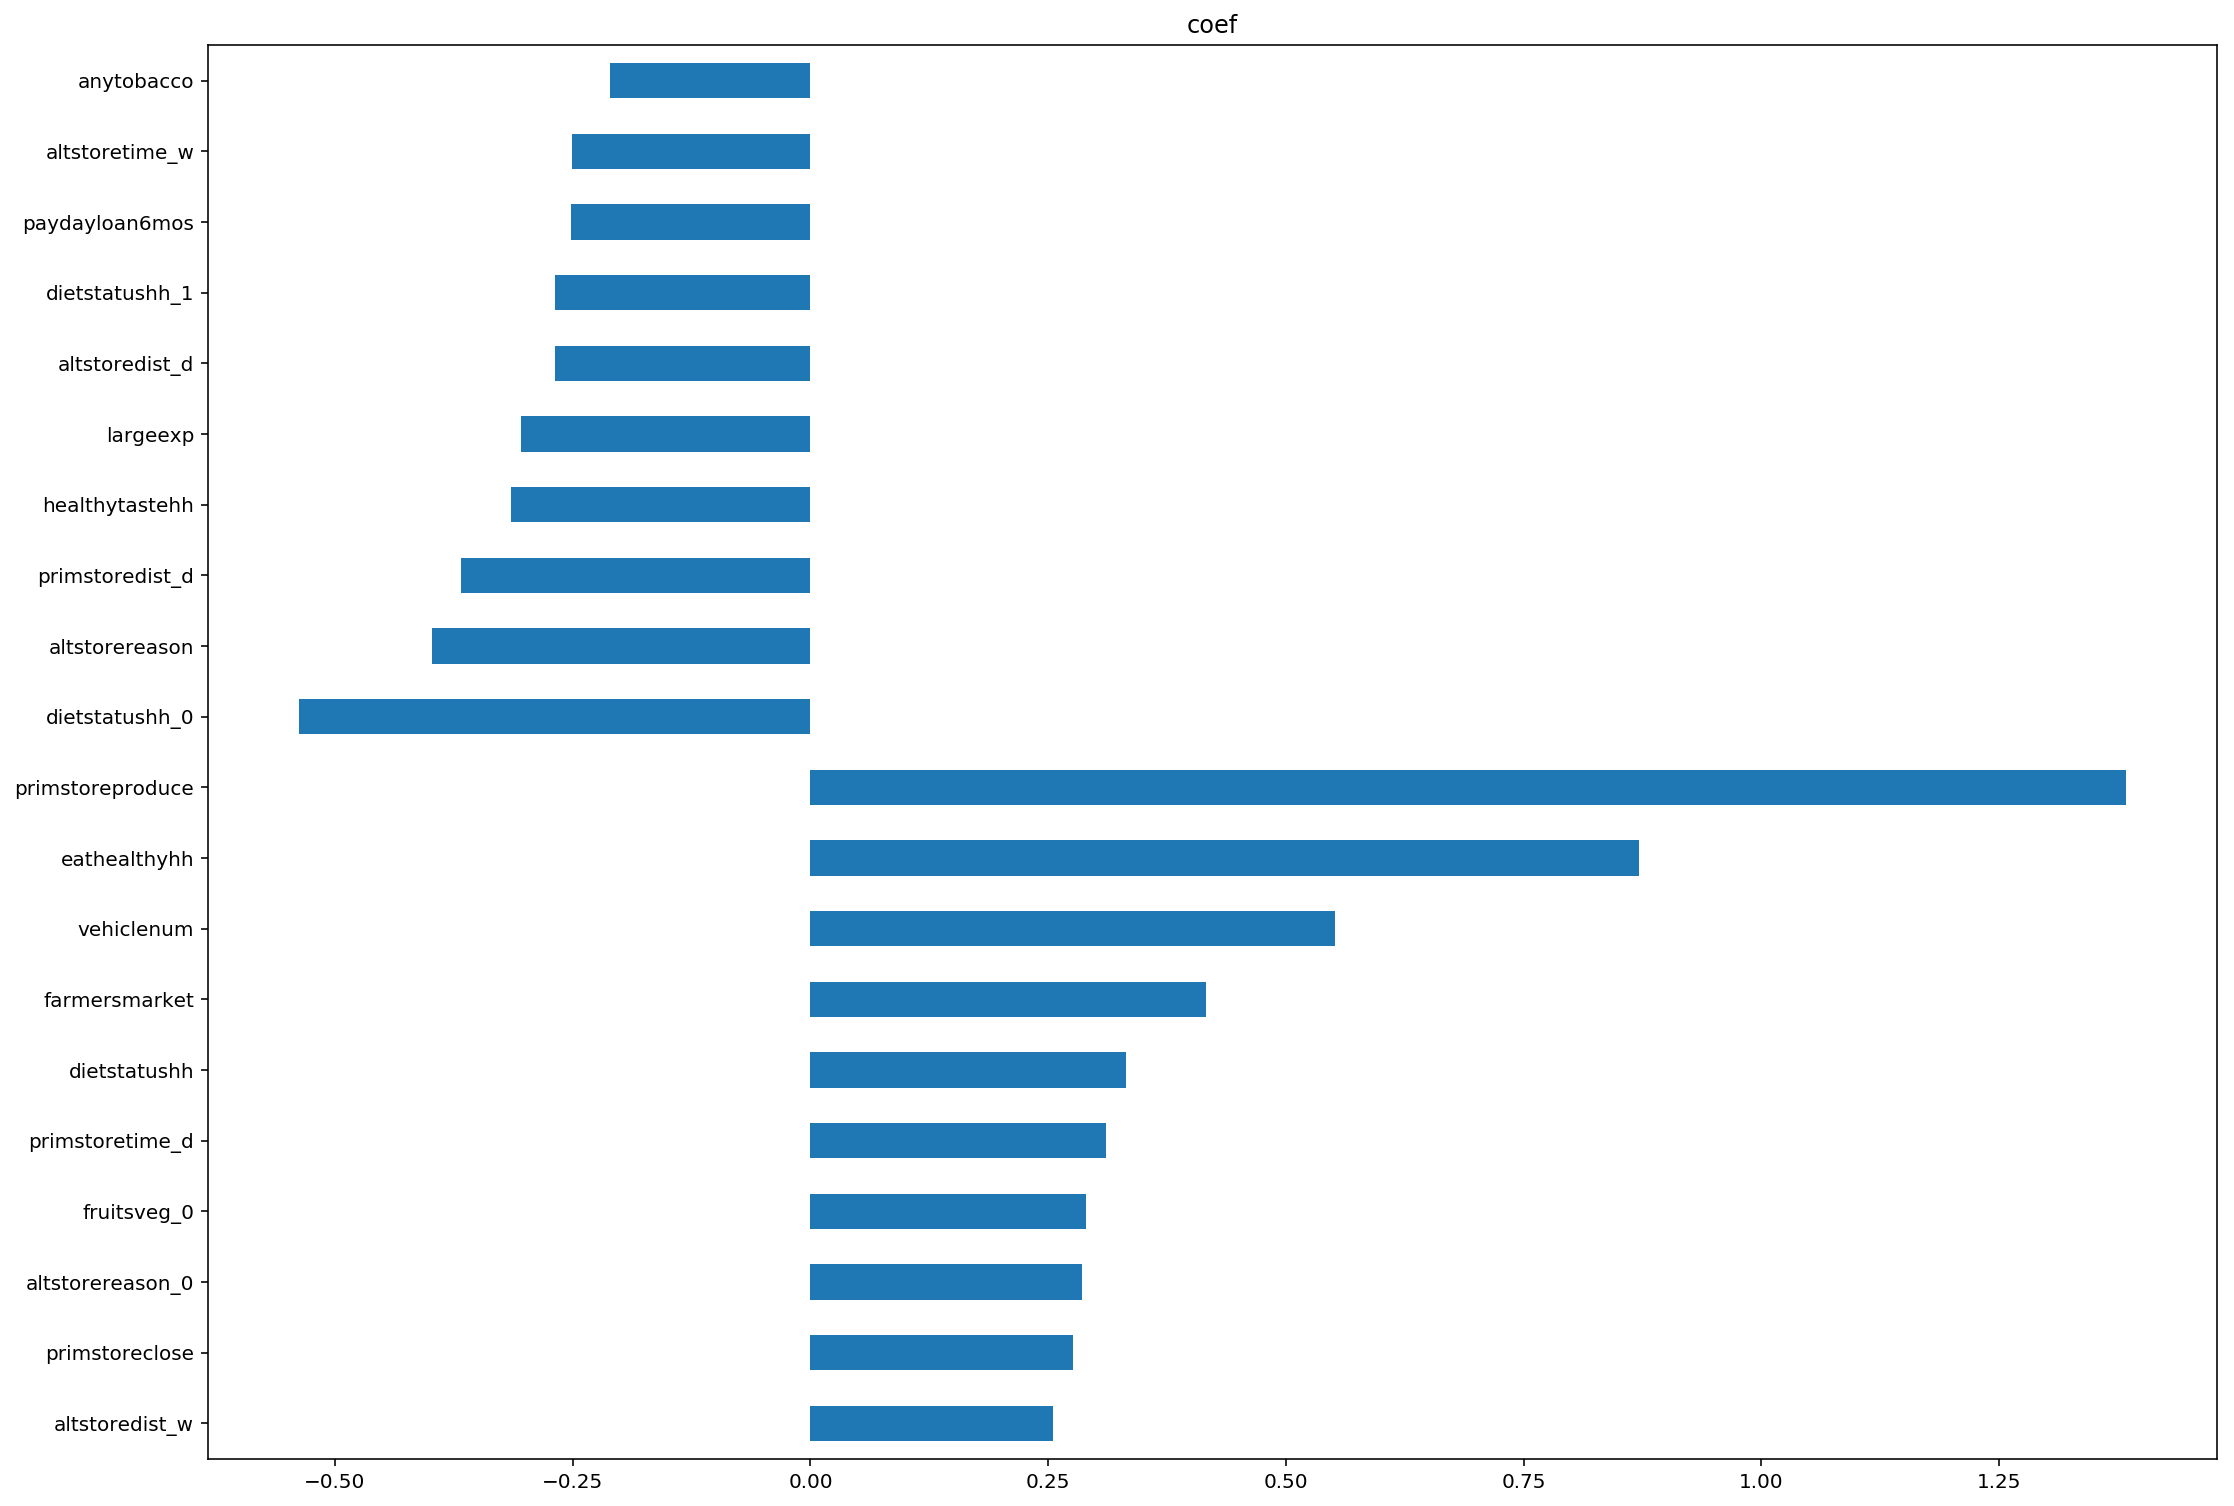

In [42]:
plot_lr_coef(lr,X1_train)

In [43]:
print('Logistic Regression')
scores=cv_scores(lr_pipe,X1_train,y1_train,X1_test,y1_test)

Logistic Regression
Accuracy score is 0.6137 +/- 0.0000
Predicted  False  True   All
Actual                      
False        598   199   797
True         309   342   651
All          907   541  1448
             precision    recall  f1-score   support

      False       0.66      0.75      0.70       797
       True       0.63      0.53      0.57       651

avg / total       0.65      0.65      0.64      1448



- Drop any features that has zero coefficients.
- Retrain models with new features.

In [44]:
coef1 = pd.Series(lr.coef_[0], index=X1_train.columns).sort_values()

In [45]:
coef1_zero=coef1[coef1.values==0].index


In [46]:
coef1_zero

Index([u'liqassets_0', u'primstoretype_0', u'altstoretype_0'], dtype='object')

In [47]:
Xcoef1=X1.drop(coef1_zero,axis=1)

In [48]:
Xcoef1_train, Xcoef1_test, y1_train, y1_test = train_test_split(Xcoef1, y1, train_size=0.7)

In [49]:
lr_pipe.fit(Xcoef1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [50]:
print('Logistic Regression')
scores=cv_scores(lr_pipe,Xcoef1_train,y1_train,Xcoef1_test,y1_test)

Logistic Regression
Accuracy score is 0.6021 +/- 0.0000
Predicted  False  True   All
Actual                      
False        580   212   792
True         334   322   656
All          914   534  1448
             precision    recall  f1-score   support

      False       0.63      0.73      0.68       792
       True       0.60      0.49      0.54       656

avg / total       0.62      0.62      0.62      1448



### Random Forest and Support vector machine classifier with default parameters.
The Logistic Regression model scores a 0.61, which is higher than baseline . Next is to try Random Forest and Support vector machine classifier. The features importance from random forest can be extracted for analysis.

In [216]:
rf = RandomForestClassifier(n_estimators=30000, random_state=seed, n_jobs=-1)
svc=SVC(random_state=seed)
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])

In [220]:
rf_pipe.fit(X1_train,y1_train)
svc_pipe.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False))])

In [58]:
print('Random Forest score is {:.4f}'.format(rf_pipe.score(X1_test,y1_test)))
scores_rf=scores(rf_pipe,X1_test,y1_test)
print('SVC is {:.4f}'.format(svc_pipe.score(X1_test,y1_test)))
scores_cv=scores(svc_pipe,X1_test,y1_test)


Random Forest score is 0.6098
Predicted  False  True   All
Actual                      
False        621   151   772
True         414   262   676
All         1035   413  1448
             precision    recall  f1-score   support

      False       0.60      0.80      0.69       772
       True       0.63      0.39      0.48       676

avg / total       0.62      0.61      0.59      1448

SVC is 0.6064
Predicted  False  True   All
Actual                      
False        595   177   772
True         393   283   676
All          988   460  1448
             precision    recall  f1-score   support

      False       0.60      0.77      0.68       772
       True       0.62      0.42      0.50       676

avg / total       0.61      0.61      0.59      1448



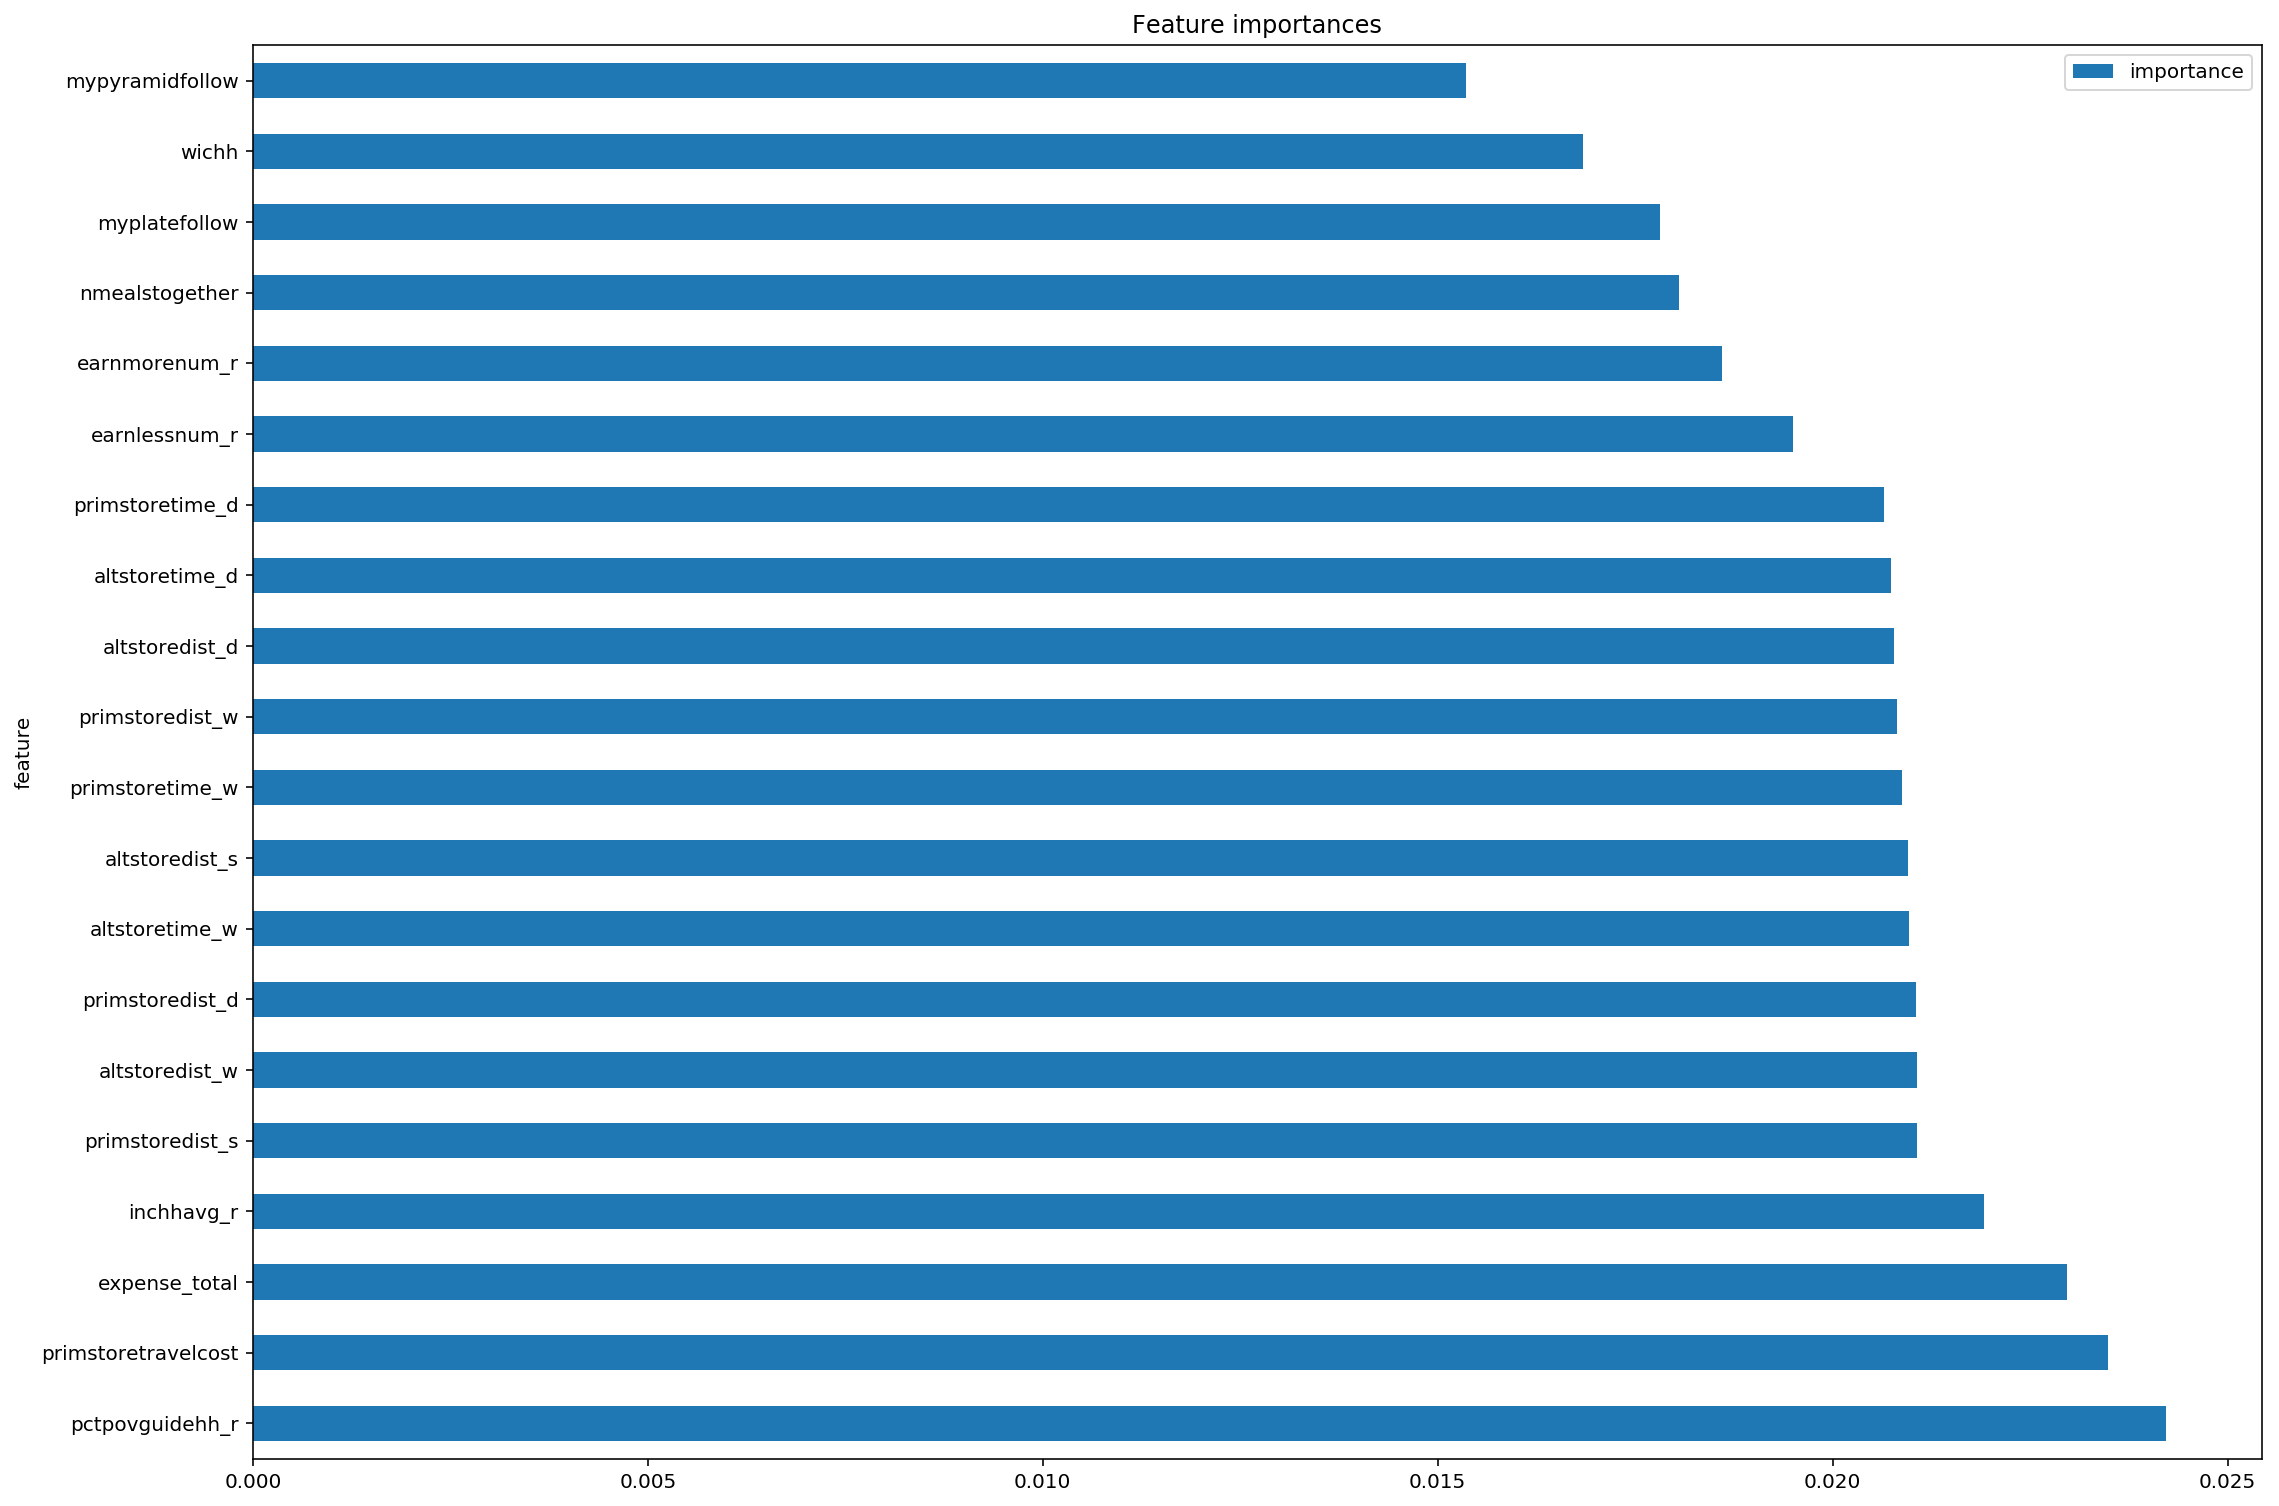

In [221]:
plot_rf_fi(rf,X1_train);

## Feature selection based on Random forest features importances

- from the feature importances retrived, I will remove features that scores below 0.01
- Will fit to Logistic Regression Model and observed results.

In [222]:
fi_clif1 = pd.DataFrame({'feature':X1_train.columns,'importance':rf.feature_importances_})
fi_clif1.sort_values('importance', ascending=False, inplace=True)

In [231]:
zero_rf1=fi_clif1[fi_clif1.values<=0.000003]


In [232]:
X_rf1=X1.drop(zero_rf1.feature,axis=1)

In [233]:
X_rf1.shape

(4826, 169)

In [235]:
Xrf1_train, Xrf1_test, y1_train, y1_test = train_test_split(X_rf1, y1, train_size=0.7)

In [236]:
lr_pipe.fit(Xrf1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [237]:
scores=cv_scores(lr_pipe,Xrf1_train,y1_train,Xrf1_test,y1_test)
print('Accuracy score for logistic regression is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.6060 +/- 0.0000
Predicted  False  True   All
Actual                      
False        593   210   803
True         316   329   645
All          909   539  1448
             precision    recall  f1-score   support

      False       0.65      0.74      0.69       803
       True       0.61      0.51      0.56       645

avg / total       0.63      0.64      0.63      1448

Accuracy score for logistic regression is 0.6060 +/- 0.0000


In [238]:
lrcv = LogisticRegressionCV(penalty='l2', Cs=100, cv=10, solver='liblinear',random_state=seed)
lrcv.fit(Xrf1_train, y1_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [239]:
lrcv.C_

array([ 0.03199267])

In [240]:
lrcv.score(Xrf1_test,y1_test)

0.63328729281767959

In [241]:
lr = LogisticRegression(random_state=seed,C=0.03199267)
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])

In [244]:
lr_pipe.fit(Xrf1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=0.03199267, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [245]:
scores=cv_scores(lr_pipe,Xrf1_train,y1_train,Xrf1_test,y1_test)

Accuracy score is 0.6104 +/- 0.0000
Predicted  False  True   All
Actual                      
False        596   207   803
True         322   323   645
All          918   530  1448
             precision    recall  f1-score   support

      False       0.65      0.74      0.69       803
       True       0.61      0.50      0.55       645

avg / total       0.63      0.63      0.63      1448



In [246]:
rf = RandomForestClassifier(n_estimators=30000, random_state=seed, n_jobs=-1)
svc=SVC(random_state=seed)
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])

In [247]:
rf_pipe.fit(Xrf1_train,y1_train)
svc_pipe.fit(Xrf1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False))])

In [250]:
print('Random Forest score is {:.4f}'.format(rf_pipe.score(Xrf1_test,y1_test)))
scores_rf=scores(rf_pipe,Xrf1_test,y1_test)
print('SVC score is {:.4f}'.format(rf_pipe.score(Xrf1_test,y1_test)))
scores_cv=scores(svc_pipe,Xrf1_test,y1_test)


Random Forest score is 0.6215
Predicted  False  True   All
Actual                      
False        638   165   803
True         383   262   645
All         1021   427  1448
             precision    recall  f1-score   support

      False       0.62      0.79      0.70       803
       True       0.61      0.41      0.49       645

avg / total       0.62      0.62      0.61      1448

SVC score is 0.6215
Predicted  False  True   All
Actual                      
False        607   196   803
True         336   309   645
All          943   505  1448
             precision    recall  f1-score   support

      False       0.64      0.76      0.70       803
       True       0.61      0.48      0.54       645

avg / total       0.63      0.63      0.62      1448



### Default Features 

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC (Default Features)| 0.68 | 0.50|0.59|
| Logistic Regression (Default Features)| 0.70|0.57|0.64 |
| Random Forest (Default Features)| 0.69|0.48|0.59 |



### Best models so far 

| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC (RF Features importances)| 0.70 | 0.54|0.62|
| Logistic Regression (RF Features importances)| 0.69|0.55|0.63 |
| Random Forest (RF Features importances)| 0.70|0.49|0.61 |

- Even though there is a decrease inF1 scores for Logistics Regression after using RF Features importances, there is overall increase for both RF and SVC.

- Therefore features from RF Features importance will be implemented.




## PCA
Given the huge amount of features, I've decided to try and see if strongly correlated features could be reduced by Principal Component Analysis.
Create a pipeline of three steps. 
- First, standardize the data.
- Second, tranform the data with PCA.
- Third, train a logistic regression on the data.

In [137]:
pca = PCA(n_components=5)

In [138]:
pca.fit(X1_train)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [139]:
princomps = pca.components_

In [140]:
princomps.shape

(5, 172)

In [141]:
exp_var = pca.explained_variance_ratio_
exp_var

array([  8.82431622e-01,   1.15472870e-01,   9.17904319e-04,
         5.74988436e-04,   1.67949319e-04])

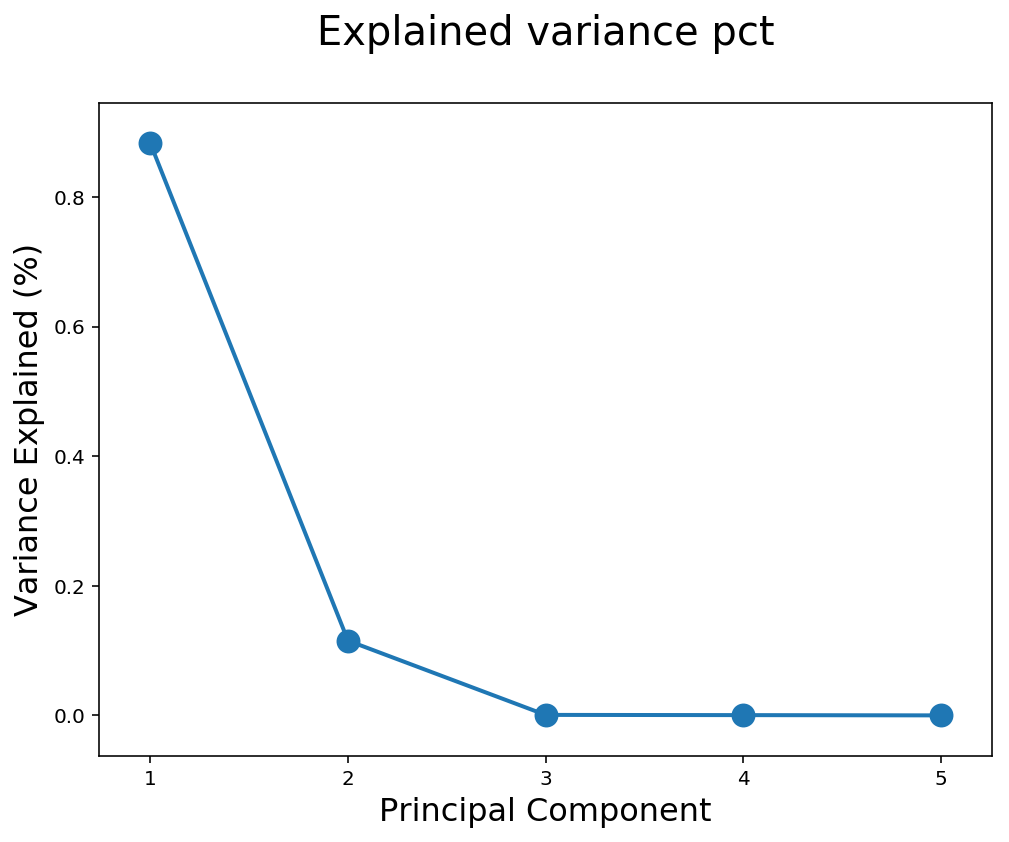

In [142]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var)+1), exp_var, lw=2)
ax.scatter(range(1, len(exp_var)+1), exp_var, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

### Use 3 principal components
- based on the graph, first 3 principal components should explain about 90% of our data. 

In [143]:
pca = PCA(n_components=3)
lr = LogisticRegression(random_state=seed)
pipe =Pipeline(steps=[('ss', ss), 
                       ('pca', pca), 
                       ('logreg', lr)])

In [144]:
pipe.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [145]:
pipe.score(X1_test,y1_test)

0.55110497237569056

In [146]:
scores=cv_scores(pipe,X1_train,y1_train,X1_test,y1_test)

Accuracy score is 0.5565 +/- 0.0000
Predicted  False  True   All
Actual                      
False        797     2   799
True         648     1   649
All         1445     3  1448
             precision    recall  f1-score   support

      False       0.55      1.00      0.71       799
       True       0.33      0.00      0.00       649

avg / total       0.45      0.55      0.39      1448



- Overall decrease in performance.


### PCA with SVM classifier

In [147]:
pca = PCA(n_components=3)
svc=SVC(random_state=seed)
svc_pipe = Pipeline(steps=[('ss', ss), 
                       ('pca', pca), 
                       ('svc', svc)])

In [148]:
svc_pipe.fit(X1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False))])

In [149]:
svc_pipe.score(X1_test,y1_test)

0.54350828729281764

In [150]:
scores=cv_scores(svc_pipe,X1_train,y1_train,X1_test,y1_test)
print('Accuracy score for svc is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.5441 +/- 0.0000
Predicted  False  True   All
Actual                      
False        778    21   799
True         640     9   649
All         1418    30  1448
             precision    recall  f1-score   support

      False       0.55      0.97      0.70       799
       True       0.30      0.01      0.03       649

avg / total       0.44      0.54      0.40      1448

Accuracy score for svc is 0.5441 +/- 0.0000


- Worse performance.
- decided to stick with Features selection based on RF features importances.

## SVM Classifier Parameter Tuning
- Gridsearch parameter C and gamma for SVC

In [251]:
svc=SVC(random_state=seed)
svc_pipe = Pipeline(steps=[('ss', ss), ('svc', svc)])
svc_pipe.fit(Xrf1_train,y1_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=17, shrinking=True,
  tol=0.001, verbose=False))])

In [252]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'svc__C': Cs, 'svc__gamma' : gammas}
    grid_search = GridSearchCV(svc_pipe, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [253]:
svc_param_selection(Xrf1_train, y1_train, 10)

{'svc__C': 1, 'svc__gamma': 0.001}

In [254]:
svc=SVC(random_state=seed,C=1,gamma=0.001)
svc_pipe = Pipeline(steps=[('ss', ss), ('svc', svc)])
svc_pipe.fit(Xrf1_train,y1_train)
scores=cv_scores(svc_pipe,Xrf1_train,y1_train,Xrf1_test,y1_test)
print('Accuracy score for svc is {:.4f} +/- {:.4f}'.format(np.mean(scores), np.std(np.std(scores))))

Accuracy score is 0.6193 +/- 0.0000
Predicted  False  True   All
Actual                      
False        616   187   803
True         350   295   645
All          966   482  1448
             precision    recall  f1-score   support

      False       0.64      0.77      0.70       803
       True       0.61      0.46      0.52       645

avg / total       0.63      0.63      0.62      1448

Accuracy score for svc is 0.6193 +/- 0.0000


## Final Model selection :



| Model Selection | F1 Score(False) | F1 Score(True) | F1 Score(Avg) |        
| :- |:------------- |:------------- | :------------- |:-------------|
|SVC (RF Features importances)| 0.70 | 0.54|0.62|
| Logistic Regression (RF Features importances)| 0.69|0.55|0.63 |
| Random Forest (RF Features importances)| 0.70|0.49|0.61 |
| Logistic Regression (Default Features)| 0.70|0.57|0.64 |

- There are liitle difference between SVC and Logistic Regression using features from Random forest features selection.
- Another option is to use Logistic Regression with default features which actually gives the best scores.



In [259]:
lr = LogisticRegression(C=0.03199267,random_state=seed)
lr_pipe = Pipeline(steps=[('ss', ss),('logreg', lr)])
svc = SVC(random_state=seed)#probability=True)
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])
rf = RandomForestClassifier(n_estimators=30000, random_state=seed, n_jobs=-1)
rf_pipe = Pipeline(steps=[('ss',ss),('rf',rf)])

In [260]:
estimators = []
model1 = lr_pipe
estimators.append(('lr', model1))
model2 = svc_pipe
estimators.append(('svm', model2))
model3 = rf_pipe
estimators.append(('rf', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='hard')

In [261]:
print('Ensemble Voting Classifier(3 models, voting=hard)')
ensemble.fit(Xrf1_train,y1_train)
scores=cv_scores(ensemble,Xrf1_train,y1_train,Xrf1_test,y1_test)

Ensemble Voting Classifier(3 models, voting=hard)
Accuracy score is 0.6193 +/- 0.0000
Predicted  False  True   All
Actual                      
False        618   185   803
True         341   304   645
All          959   489  1448
             precision    recall  f1-score   support

      False       0.64      0.77      0.70       803
       True       0.62      0.47      0.54       645

avg / total       0.63      0.64      0.63      1448



In [262]:
svc = SVC(random_state=seed,probability=True)
svc_pipe=Pipeline(steps=[('ss',ss),('svc',svc)])

estimators = []
model1 = lr_pipe
estimators.append(('lr', model1))
model2 = svc_pipe
estimators.append(('svm', model2))
model3 = rf_pipe
estimators.append(('rf', model3))
ensemble1 = VotingClassifier(estimators,voting='soft')

In [263]:
print('Ensemble Voting Classifier(3 models, voting=soft)')
ensemble1.fit(Xrf1_train,y1_train)
scores=cv_scores(ensemble1,Xrf1_train,y1_train,Xrf1_test,y1_test)

Ensemble Voting Classifier(3 models, voting=soft)
Accuracy score is 0.6237 +/- 0.0000
Predicted  False  True   All
Actual                      
False        624   179   803
True         348   297   645
All          972   476  1448
             precision    recall  f1-score   support

      False       0.64      0.78      0.70       803
       True       0.62      0.46      0.53       645

avg / total       0.63      0.64      0.63      1448



## Conclusion

### For Predicting of BMI based on food purchase

- The final model accuracy score improve the baseline accuracy from 58% to 59.03%
- Accuracy score is reduced in order to achieved higher F1 score.

### For Predicting of Dietary habit based on household characteristic

- The final model accuracy score improve the baseline accuracy from 55% to 62%



- 